In [1]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ROOT
%matplotlib inline
%jsroot on

Welcome to JupyROOT 6.22/01


In [2]:
pion_data = uproot.open("/home/nitish/Documents/Project_sep_2020/Data/Pion_data/ntuple_sim_config22_pdgID211_beamMomentum100_listFTFP_BERT_EMN.root")
pion_data.allkeys(filterclass=lambda cls: issubclass(cls, uproot.tree.TTreeMethods))

[b'rechitntupler/hits;1', b'trackimpactntupler/impactPoints;1']

In [3]:
pion_data["rechitntupler"].classnames()

[(b'hits;1', 'TTree')]

In [4]:
pion_data["rechitntupler/hits"].pandas.df(["*"],entrystart=0,entrystop=1, flatten=False).columns

Index(['event', 'trigger_timestamp', 'run', 'pdgID', 'beamEnergy',
       'trueBeamEnergy', 'energyLostEE', 'energyLostFH', 'energyLostBH',
       'energyLostBeam',
       ...
       'ahc_hitEnergy', 'ahc_hitTime', 'ahc_hitType', 'ahc_hitRadius',
       'ahc_hitEnergyDensity', 'ahc_hitX', 'ahc_hitY', 'ahc_hitZ',
       'lda_trigTime', 'event_BXID'],
      dtype='object', length=108)

In [3]:
positron_data = uproot.open("/home/nitish/Documents/Project_sep_2020/Data/Positron_100Gev/ntuple_sim_config22_pdgID11_beamMomentum100_listFTFP_BERT_EMN_CMSSW10_6_withAHCAL_33m_BL.root")
positron_data.allkeys(filterclass=lambda cls: issubclass(cls, uproot.tree.TTreeMethods))

[b'rechitntupler/hits;1', b'trackimpactntupler/impactPoints;1']

In [4]:
muon_data = uproot.open("/home/nitish/Documents/Project_sep_2020/Data/Muon_data/ntuple_sim_config22_pdgID13_beamMomentum200_listFTFP_BERT_EMM.root")
muon_data.allkeys(filterclass=lambda cls: issubclass(cls, uproot.tree.TTreeMethods))

[b'rechitntupler/hits;1', b'trackimpactntupler/impactPoints;1']

In [5]:
x_pion=pion_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=0,entrystop=1, flatten=False).values[0,0]
y_pion=pion_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=0,entrystop=1, flatten=False).values[0,0]
z_pion=pion_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=0,entrystop=1, flatten=False).values[0,0]
rechit_energy_pion=pion_data["rechitntupler/hits"].pandas.df(["rechit_energy"],entrystart=0,entrystop=1, flatten=False).values[0,0]

In [6]:
x_positron=positron_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=0,entrystop=1, flatten=False).values[0,0]
y_positron=positron_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=0,entrystop=1, flatten=False).values[0,0]
z_positron=positron_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=0,entrystop=1, flatten=False).values[0,0]
rechit_energy_positron=positron_data["rechitntupler/hits"].pandas.df(["rechit_energy"],entrystart=0,entrystop=1, flatten=False).values[0,0]

In [7]:
x_muon=muon_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=547,entrystop=548, flatten=False).values[0,0]
y_muon=muon_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=547,entrystop=548, flatten=False).values[0,0]
z_muon=muon_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=547,entrystop=548, flatten=False).values[0,0]
rechit_energy_muon=muon_data["rechitntupler/hits"].pandas.df(["rechit_energy"],entrystart=547,entrystop=548, flatten=False).values[0,0]

In [8]:
print(pion_data["rechitntupler/hits"].pandas.df(["rechit_energy"],entrystart=21989,entrystop=21990, flatten=False).values[0,0])
print(pion_data["rechitntupler/hits"].pandas.df(["energyLostEE"],entrystart=21989,entrystop=21990, flatten=False).values[0,0])
print(pion_data["rechitntupler/hits"].pandas.df(["energyLostFH"],entrystart=21989,entrystop=21990, flatten=False).values[0,0])

[]
0.22170766
0.068556614


In [9]:
#pion_data["rechitntupler/hits"].pandas.df(["energyLostFH"],entrystart=0,entrystop=999, flatten=False).values

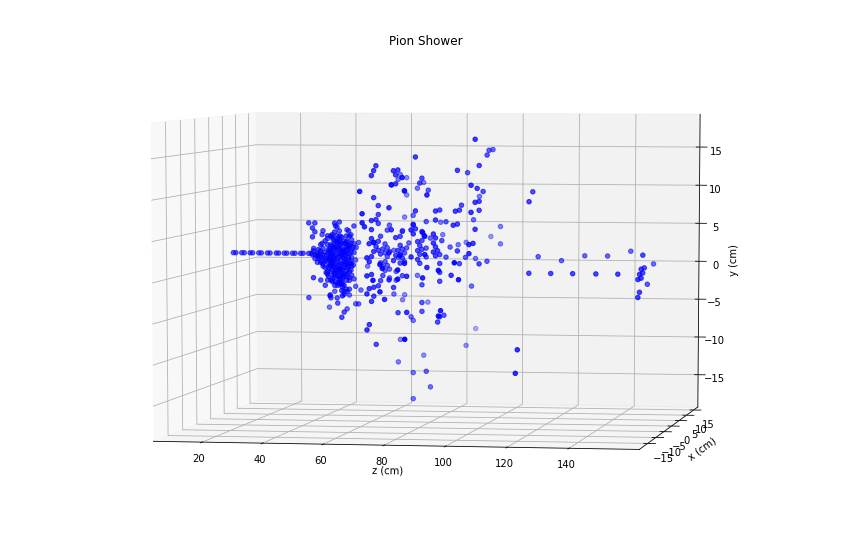

In [8]:
fig = plt.figure(figsize = (15, 10)) 

ax = plt.axes(projection ="3d") 
ax.view_init(elev=5,azim=-80)  


ax.scatter3D(z_pion, x_pion, y_pion, color = "blue",label="Pion (100GeV)")

#ax.scatter3D(z_positron, x_positron, y_positron, color = "green",label="Positron (100GeV)")

#ax.scatter3D(z_muon, x_muon, y_muon, color = "red",label="Muon (200GeV)")

ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("Pion Shower") 
#plt.legend()
plt.show()

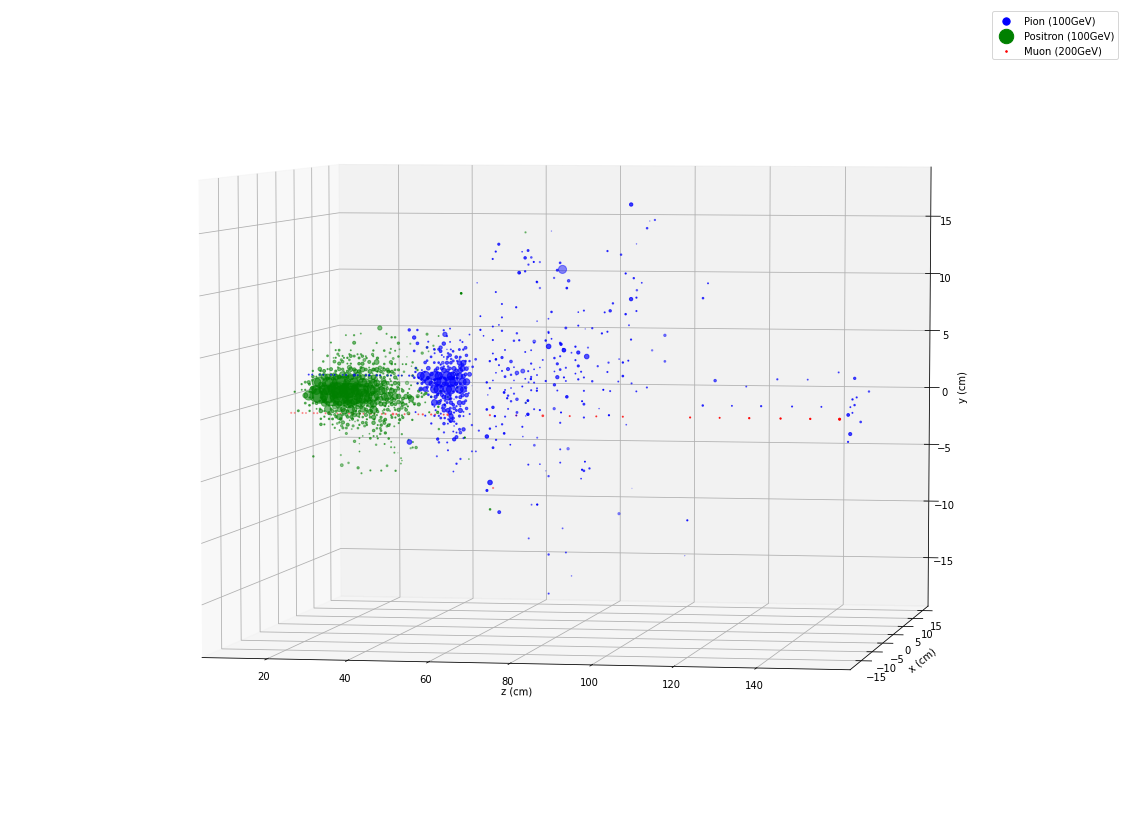

In [11]:
fig = plt.figure(figsize = (20, 15)) 

ax = plt.axes(projection ="3d") 
ax.view_init(elev=5,azim=-80)  


ax.scatter3D(z_pion, x_pion, y_pion, color = "blue", s=rechit_energy_pion, label="Pion (100GeV)")

ax.scatter3D(z_positron, x_positron, y_positron, color = "green", s=rechit_energy_positron, label="Positron (100GeV)")

ax.scatter3D(z_muon, x_muon, y_muon, color = "red", s=rechit_energy_muon, label="Muon (200GeV)")

ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("") 
plt.legend()
plt.show()

In [12]:
xx_positron=positron_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=19,entrystop=20, flatten=False).values[0,0]
yy_positron=positron_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=19,entrystop=20, flatten=False).values[0,0]
zz_positron=positron_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=19,entrystop=20, flatten=False).values[0,0]

In [13]:
xx_pion=pion_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=2989,entrystop=2990, flatten=False).values[0,0]
yy_pion=pion_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=2989,entrystop=2990, flatten=False).values[0,0]
zz_pion=pion_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=2989,entrystop=2990, flatten=False).values[0,0]

In [14]:
xx_muon=muon_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=9722,entrystop=9723, flatten=False).values[0,0]
yy_muon=muon_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=9722,entrystop=9723, flatten=False).values[0,0]
zz_muon=muon_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=9722,entrystop=9723, flatten=False).values[0,0]

In [15]:
positron_data["rechitntupler/hits"].pandas.df(["rechit_energy"],entrystart=0,entrystop=2, flatten=False).values[0]

array([array([3.83333898e+00, 3.88325781e-01, 4.01258469e+00, 2.42820606e+01,
       9.99676347e-01, 3.76753116e+00, 1.63679171e+00, 9.40296650e+00,
       9.89895344e+00, 8.57674561e+01, 1.69336569e+00, 3.51660800e+00,
       1.74767256e+00, 1.35365859e-01, 6.11602259e+00, 7.16059446e+00,
       5.59425116e+00, 7.53377151e+01, 1.76324860e+02, 9.08355772e-01,
       2.47630215e+00, 4.68546391e-01, 6.60774899e+00, 4.48637848e+01,
       2.58769751e+00, 4.34533405e+00, 2.08097816e+00, 2.19415879e+00,
       5.51120520e-01, 9.09124136e-01, 2.58877254e+00, 5.65982223e-01,
       2.76334262e+00, 2.16268420e+00, 1.27866125e+01, 8.95174026e+00,
       1.28796873e+01, 1.15399841e+02, 2.37875443e+02, 3.02248263e+00,
       1.38016069e+00, 7.98171997e+01, 6.95727682e+00, 1.79404461e+00,
       2.07735920e+00, 1.17770064e+00, 3.06644964e+00, 1.62932467e+00,
       3.47539568e+00, 2.58892679e+00, 1.59934111e+01, 7.73570585e+00,
       2.98415871e+01, 1.87957549e+00, 8.33872986e+00, 5.00586586e+01,

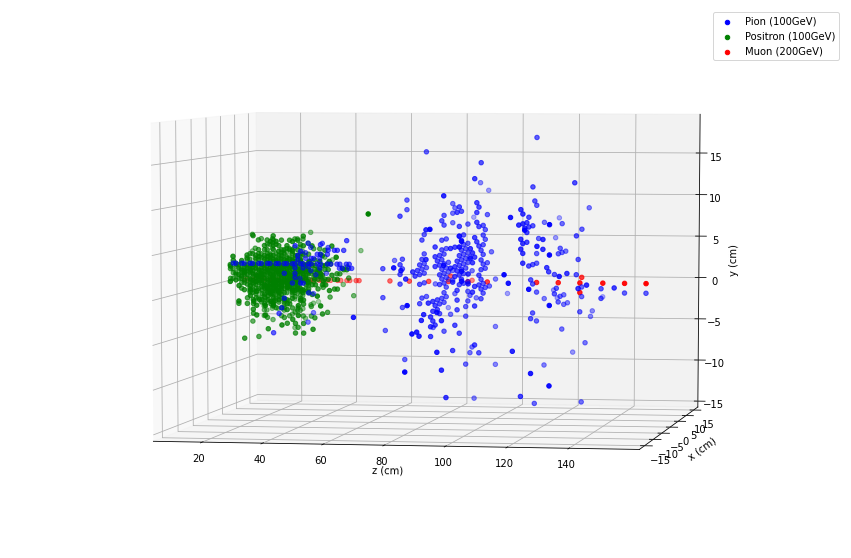

In [16]:
fig = plt.figure(figsize = (15, 10)) 

ax = plt.axes(projection ="3d") 
ax.view_init(elev=5,azim=-80)  


ax.scatter3D(zz_pion, xx_pion, yy_pion, color = "blue",label="Pion (100GeV)")

ax.scatter3D(zz_positron, xx_positron, yy_positron, color = "green",label="Positron (100GeV)")

ax.scatter3D(zz_muon, xx_muon, yy_muon, color = "red",label="Muon (200GeV)")

ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("") 
plt.legend()
plt.show()

In [17]:
def cnt(lst, end_lay):
    return np.array([lst.count(i) for i in range(1,end_lay+1)])


def lay_energy(num_hit_lay, rechit_energy, end_lay):
    return np.array([sum(rechit_energy[sum(num_hit_lay[0:i]) : (sum(num_hit_lay[0:i])+num_hit_lay[i])]) for i in range(end_lay)])

def app(df):
    return lay_energy(df.num_hits_layer, df.rechit_energy, 40)




In [18]:

ls=[1,2,3,5]
rechit_e=[1,2,3,4,5,6,7,8,9,10,11]
print([rechit_e[sum(ls[0:i]):(sum(ls[0:i])+ls[i])] for i in range(4)])
print([sum(rechit_e[sum(ls[0:i]):(sum(ls[0:i])+ls[i])]) for i in range(4)])
print(lay_energy(ls, rechit_e, 4))

[[1], [2, 3], [4, 5, 6], [7, 8, 9, 10, 11]]
[1, 5, 15, 45]
[ 1  5 15 45]


In [19]:
#This fuction is not correct
def shower_start(df):
    l=0
    
    
    if df.rechit_energy_layer[0]>20:
        l=1
    elif (df.rechit_energy_layer[1]>20 and df.rechit_energy_layer[1]>2*df.rechit_energy_layer[0]):
        l=2
    elif 1:
        for i in range(2,40):
            if ((df.rechit_energy_layer[i]>20) and (df.rechit_energy_layer[i]>2*df.rechit_energy_layer[i-1]) and (df.rechit_energy_layer[i]>2*df.rechit_energy_layer[i-2])):
                l=i+1
    
    return l
        

In [20]:
def shower_start_updated(df):
        
    l=0
    for i in range(40):
        if (i==0) and (df.rechit_energy_layer[i]>20):
            l=1
            break
        elif (i==1) and (df.rechit_energy_layer[1]>20 and df.rechit_energy_layer[1]>2*df.rechit_energy_layer[0]):
            l=2
            break
        elif (i>1) and ((df.rechit_energy_layer[i]>20) and (df.rechit_energy_layer[i]>2*df.rechit_energy_layer[i-1]) and (df.rechit_energy_layer[i]>2*df.rechit_energy_layer[i-2])):
            l=i+1
            break
    
    return l

In [21]:
#Shower_start_pion = positron_lay_data.apply(shower_start_updated, axis=1)
#(Shower_start_pion)

In [22]:
#num_shower_each_layer = [list(Shower_start_pion).count(i+1) for i in range(40)]
#print(num_shower_each_layer)
#fract_shower_start_EE = sum(num_shower_each_layer[:28])
#fract_shower_start_EE/99505

In [23]:
lay=[13.8775,  14.7675,  16.7825,  17.6725,  19.6875,  20.5775,
        22.6925,  23.5825,  25.6975,  26.5875,  28.7025,  29.5925,
        31.5075,  32.3975,  34.3125,  35.2025,  37.1175,  38.0075,
        39.9225,  40.8125,  42.9075,  44.0375,  46.4125,  47.5425,
        49.682 ,  50.688 ,  52.8815,  53.9035,  64.6185,  71.326 ,
        78.0335,  84.841 ,  91.5485,  98.236 , 115.153 , 122.561 ,
       129.969 , 137.796 , 145.203 , 152.511]
#plt.scatter(lay, num_shower_each_layer)
#plt.yscale("log")

In [24]:
#positron_lay_data = positron_data["rechitntupler/hits"].pandas.df(["event", "rechit_layer"], flatten=False)
#positron_lay_data

In [25]:
#positron_lay_data["num_hits_layer"]= positron_lay_data.rechit_layer.map(lambda x : cnt(list(x),40))

In [26]:
#positron_lay_data["rechit_energy"] = positron_data["rechitntupler/hits"].pandas.df(["rechit_energy"], flatten=False)
#positron_lay_data["rechit_energy_layer"] = positron_lay_data.apply(app, axis=1)
#positron_lay_data["shower_start_layer"] = positron_lay_data.apply(shower_start_updated, axis=1)
#positron_lay_data

In [27]:
#positron_lay_data.to_pickle("layer_data_positron_100Gev_02.pkl")

In [3]:
pion_lay_data = pd.read_pickle("layer_data_pion_100Gev.pkl")
pion_lay_data

,event,rechit_layer,num_hits_layer,rechit_energy,rechit_energy_layer,shower_start_layer
entry,,,,,,
0,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0715647, 0.99555194, 0.79866993, 1.0628434,...","[1.0715646743774414, 0.9955519437789917, 0.798...",19
1,2,"[1, 2, 3, 3, 4, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, ...","[1, 1, 2, 1, 2, 5, 12, 14, 15, 14, 17, 14, 18,...","[1.8395209, 0.94343525, 1.015716, 9.022692, 1....","[1.8395209312438965, 0.9434352517127991, 10.03...",6
2,3,"[1, 2, 3, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 9, ...","[1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 4, 1, 2, 1, 1, ...","[1.0317942, 1.1344273, 1.9331596, 3.4039767, 1...","[1.0317941904067993, 1.1344273090362549, 1.933...",35
3,4,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.9768669, 1.1809574, 1.1741996, 3.34455, 1.3...","[0.9768669009208679, 1.1809574365615845, 1.174...",22
4,5,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, ...","[5, 9, 11, 13, 17, 28, 35, 33, 32, 35, 40, 33,...","[10.572215, 18.312164, 2.1784604, 1.8308676, 0...","[32.994283214211464, 93.12621653079987, 196.30...",1
...,...,...,...,...,...,...
99500,19897,"[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, ...","[8, 11, 20, 27, 37, 39, 37, 37, 37, 30, 33, 30...","[3.1234915, 6.909852, 8.016854, 12.054954, 1.1...","[41.24006164073944, 115.60279536247253, 284.40...",1
99501,19898,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.5244232, 1.5852399, 1.0509315, 1.0849319, 1...","[0.5244231820106506, 1.5852398872375488, 1.050...",24
99502,19899,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.2344711, 2.8547604, 0.979683, 1.1346515, 1....","[1.234471082687378, 2.8547604084014893, 0.9796...",30


In [29]:
#print([sum(muon_lay_data.rechit_energy_layer.values[i]) for i in range(10)])
#print([sum(muon_lay_data.rechit_energy.values[i]) for i in range(10)])

In [30]:
#positron_lay_data = positron_lay_data.drop('shower_start_layer', axis=1)
#positron_lay_data

In [31]:
#positron_lay_data["shower_start_layer"] = positron_lay_data.apply(shower_start_updated, axis=1)
#positron_lay_data

In [32]:
#positron_lay_data.to_pickle("layer_data_positron_100Gev.pkl")

In [4]:
positron_lay_data = pd.read_pickle("layer_data_positron_100Gev_02.pkl")
positron_lay_data

,event,rechit_layer,num_hits_layer,rechit_energy,rechit_energy_layer,shower_start_layer
entry,,,,,,
0,1,"[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, ...","[7, 6, 17, 19, 22, 32, 34, 41, 34, 38, 35, 36,...","[3.833339, 0.38832578, 4.0125847, 24.28206, 0....","[38.92030927538872, 112.02702224254608, 338.66...",1
1,2,"[1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, ...","[1, 4, 9, 12, 15, 27, 24, 36, 42, 49, 43, 39, ...","[4.615594, 16.611902, 2.2574925, 1.004284, 1.6...","[4.615593910217285, 21.513360619544983, 134.24...",2
2,3,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...","[5, 6, 16, 22, 22, 27, 41, 39, 38, 46, 52, 51,...","[0.76982266, 16.23052, 1.894915, 1.9754263, 1....","[21.99822837114334, 96.83178961277008, 274.127...",1
3,4,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, ...","[5, 7, 10, 20, 22, 30, 30, 50, 37, 45, 43, 42,...","[8.012821, 6.118504, 2.9899507, 0.94007266, 0....","[18.570740878582, 80.81473791599274, 259.18982...",2
4,5,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, ...","[5, 9, 15, 20, 23, 27, 30, 35, 42, 40, 48, 48,...","[29.551352, 24.717716, 5.237375, 2.5569797, 0....","[62.17600443959236, 138.05511093139648, 342.07...",1
...,...,...,...,...,...,...
96135,96,"[1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, ...","[2, 4, 8, 13, 15, 23, 33, 35, 46, 37, 48, 40, ...","[1.33578, 3.7891111, 23.223791, 5.894603, 2.34...","[5.12489116191864, 32.96048355102539, 135.0523...",2
96136,97,"[1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, ...","[5, 8, 18, 20, 18, 33, 31, 42, 44, 53, 52, 37,...","[8.621534, 12.458624, 3.4394486, 0.92760795, 5...","[31.417080104351044, 92.91191071271896, 221.05...",1
96137,98,"[1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, ...","[2, 6, 8, 8, 14, 25, 25, 30, 43, 39, 42, 35, 4...","[4.8597116, 1.9067363, 2.207037, 1.2364944, 0....","[6.766447901725769, 39.7909272313118, 82.10875...",2


In [5]:
def ecal(df):
    return sum(df.rechit_energy_layer[:28])

In [7]:
positron_lay_data["ecal_ene"] = positron_lay_data.apply(ecal, axis=1)
pion_lay_data["ecal_ene"] = pion_lay_data.apply(ecal, axis=1)

In [9]:
ecal_pion_shower_1 = pion_lay_data.loc[(pion_lay_data.shower_start_layer)==1].ecal_ene.values
ecal_positron_shower_1 = positron_lay_data.head(7712).ecal_ene.values

In [16]:
%jsroot on
c = ROOT.TCanvas()

ene = 300

H_positron_pred_ne = ROOT.TH1F("H_positron_pred_ne","Ecal Energy Distribution for 100GeV Particle;Energy(MIPS);No. of Entries",150,0,12000)
H_positron_pred_NN = ROOT.TH1F("Positron","Ecal Energy Distribution for 100GeV Particle;Energy(MIPS);No. of Entries",150,0,12000)


#pred_energy_positron_ne = positron_ne_pred.loc[positron_ne_pred.beamEnergy==ene].pred_energy.values
#pred_energy_positron_NN = positron_NN_pred.loc[positron_NN_pred.beamEnergy==ene].predicted_energy.values


for i in range(ecal_pion_shower_1.size):
    H_positron_pred_ne.Fill(ecal_pion_shower_1[i])
    
for i in range(ecal_positron_shower_1.size):
    H_positron_pred_NN.Fill(ecal_positron_shower_1[i])
    
    


H_positron_pred_ne.SetLineColor(2)
H_positron_pred_NN.SetLineColor(4)


H_positron_pred_NN.Draw()
H_positron_pred_ne.Draw('same')

legend = ROOT.TLegend();
legend.AddEntry("H_positron_pred_ne","Pion(Shower starting in 1st layer)","h");
legend.AddEntry("Positron","Positron","h");
legend.Draw();

#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_positron_pred_ne (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Positron (Potential memory leak).


In [34]:
muon_lay_data = pd.read_pickle("layer_data_muon_200Gev.pkl")
muon_lay_data

,event,rechit_layer,num_hits_layer,rechit_energy,rechit_energy_layer,shower_start_layer
entry,,,,,,
0,1,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.8369987, 0.95882297, 0.8763111, 1.1187717, ...","[0.836998701095581, 0.9588229656219482, 0.8763...",0
1,2,"[29, 30, 31, 32, 33, 34, 34, 35, 35, 36, 37, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.8578016, 1.0453144, 1.0947642, 0.9249582, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,3,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, ...","[1.5422463, 3.799931, 3.730178, 0.79438215, 0....","[1.5422463417053223, 3.799931049346924, 3.7301...",0
3,4,"[1, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1.0403298, 0.8361269, 1.0340732, 1.3752311, 6...","[1.0403298139572144, 0.8361269235610962, 1.034...",34
4,5,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.8250753, 0.76595145, 1.1280183, 1.0841419, ...","[0.8250753283500671, 0.7659514546394348, 1.128...",26
...,...,...,...,...,...,...
498002,97302,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2.4094207, 1.1213189, 1.0955873, 1.2201414, 1...","[2.4094207286834717, 1.1213189363479614, 1.095...",0
498003,97303,"[29, 29, 30, 31, 32, 33, 34, 35, 36, 36, 36, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.4296513, 1.6037302, 1.6596216, 1.4944705, 0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
498004,97304,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.9427539, 1.1337212, 1.4109373, 0.75481045, ...","[0.9427539110183716, 1.1337212324142456, 1.410...",0


In [35]:
(list(muon_lay_data.shower_start_layer.values)).count(0)

413466

In [36]:
rechit_layer=pion_data["rechitntupler/hits"].pandas.df(["rechit_layer"],entrystart=0,entrystop=1, flatten=False).values[0,0]
z_pion=pion_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=0,entrystop=1, flatten=False).values[0,0]
lay_loc_z = [z_pion[list(rechit_layer).index(i+1)] for i in range(40)]
dist_btw_lay = [(lay_loc_z[i+1]-lay_loc_z[i]) for i in range(39)]
print(lay_loc_z)
print(dist_btw_lay)

[13.8775, 14.7675, 16.7825, 17.6725, 19.6875, 20.5775, 22.6925, 23.5825, 25.6975, 26.5875, 28.7025, 29.5925, 31.5075, 32.3975, 34.3125, 35.2025, 37.1175, 38.0075, 39.9225, 40.8125, 42.9075, 44.0375, 46.4125, 47.5425, 49.682, 50.688, 52.8815, 53.9035, 64.6185, 71.326, 78.0335, 84.841, 91.5485, 98.236, 115.153, 122.561, 129.969, 137.796, 145.203, 152.511]
[0.89000034, 2.0149994, 0.8900013, 2.0149994, 0.8899994, 2.1149998, 0.8900013, 2.1149998, 0.8899994, 2.1149998, 0.8900013, 1.914999, 0.8899994, 1.9150009, 0.8899994, 1.9150009, 0.8899994, 1.9150009, 0.8899994, 2.0950012, 1.1299973, 2.375, 1.1300011, 2.1394997, 1.0060005, 2.1935005, 1.0219994, 10.715, 6.7074966, 6.7075043, 6.8075027, 6.7074966, 6.6875, 16.917, 7.407997, 7.407997, 7.827011, 7.4069977, 7.3079987]


In [37]:
config_lengths = pd.read_csv('/home/nitish/Documents/Project_sep_2020/Data/config1_lengths.txt', delimiter="\t", names=["Layer_Number", "z_mm", "X0", "Nuclear_interaction_length", "Pion_interaction_length"])
config_lengths

,Layer_Number,z_mm,X0,Nuclear_interaction_length,Pion_interaction_length
0,1,138.775,1.00114,0.050461,0.042490
1,2,147.675,1.98059,0.111970,0.094299
2,3,167.825,2.91411,0.145689,0.123714
3,4,176.725,3.89356,0.207199,0.175523
4,5,196.875,4.82708,0.240918,0.204938
...,...,...,...,...,...
74,75,2485.510,100.63400,8.931500,7.382730
75,76,2511.710,101.67000,9.040030,7.471860
76,77,2537.910,102.70600,9.148550,7.560990
77,78,2564.110,103.74200,9.257080,7.650120


In [38]:
lambda_pion_40_lay = config_lengths.Pion_interaction_length.values[:40]
lambda_pion_40_lay

array([0.0424903, 0.0942989, 0.123714 , 0.175523 , 0.204938 , 0.256746 ,
       0.286162 , 0.33797  , 0.367385 , 0.419194 , 0.448609 , 0.500418 ,
       0.529833 , 0.581641 , 0.611057 , 0.662865 , 0.69228  , 0.744089 ,
       0.773504 , 0.825313 , 0.854728 , 0.919502 , 0.948918 , 1.01369  ,
       1.04311  , 1.10416  , 1.13357  , 1.1959   , 1.4419   , 1.68425  ,
       1.9266   , 2.16894  , 2.41129  , 2.64702  , 2.97765  , 3.22     ,
       3.46235  , 3.70777  , 3.94672  , 4.18258  ])

In [39]:
X0_pion_40_lay = config_lengths.X0.values[:40]
X0_pion_40_lay

array([ 1.00114,  1.98059,  2.91411,  3.89356,  4.82708,  5.80653,
        6.74005,  7.7195 ,  8.65302,  9.63247, 10.566  , 11.5454 ,
       12.479  , 13.4584 , 14.3919 , 15.3714 , 16.3049 , 17.2844 ,
       18.2179 , 19.1973 , 20.1308 , 21.2774 , 22.211  , 23.3575 ,
       24.2911 , 25.5403 , 26.4738 , 27.7602 , 30.597  , 33.4725 ,
       36.348  , 39.2235 , 42.099  , 44.8892 , 48.7909 , 51.6664 ,
       54.5419 , 57.6129 , 60.6003 , 63.3922 ])

In [40]:
positron_shower_srt_loc = list(positron_lay_data.shower_start_layer.values)
muon_shower_srt_loc = list(muon_lay_data.shower_start_layer.values)
pion_shower_srt_loc = list(pion_lay_data.shower_start_layer.values)
#positron_shower_srt_loc

In [41]:
frac_shower_pion = [((pion_shower_srt_loc.count(i))/len(pion_shower_srt_loc)) for i in range(1,41)]
frac_shower_positron = [((positron_shower_srt_loc.count(i))/len(positron_shower_srt_loc)) for i in range(1,41)]
frac_shower_muon = [((muon_shower_srt_loc.count(i))/len(muon_shower_srt_loc)) for i in range(1,41)]

print(frac_shower_pion)
print(frac_shower_positron)
print(frac_shower_muon)

[0.07750364303301342, 0.04483191799407065, 0.032973217426259985, 0.03802823978694538, 0.03073212401386865, 0.034329933169187477, 0.02804884176674539, 0.03264157580021104, 0.025194713833475706, 0.02918446309230692, 0.024159589970353248, 0.027074016381086377, 0.021566755439425156, 0.025536405205768553, 0.020189940204009847, 0.02358675443445053, 0.018803075222350637, 0.020762775739912566, 0.01538616149942214, 0.018692528013667654, 0.014501783829958294, 0.020511532083814885, 0.015114818350836641, 0.018652329028692027, 0.013466659966835838, 0.014672629516104718, 0.011969247776493644, 0.012140093462640068, 0.058931711974272646, 0.04570624591729059, 0.03506356464499271, 0.028671926033867645, 0.022370735138937742, 0.01690367318225215, 0.018350836641374806, 0.010220591930053766, 0.009074920858248329, 0.006029847746344405, 0.004803778704587709, 0.0039696497663434]
[0.7229873101726648, 0.25501352194716037, 0.019991678801747452, 0.001227376742250884, 0.00041605991262741833, 0.00011441647597254005,

In [42]:
positron_shower_srt_loc.count(0)

6

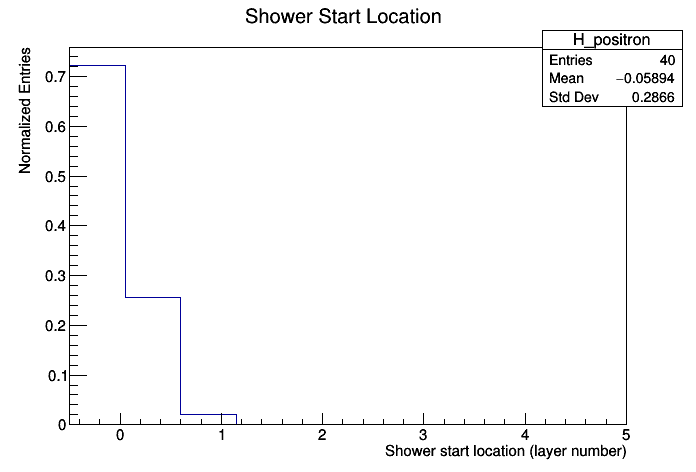

In [43]:
c=ROOT.TCanvas()

H_positron = ROOT.TH1F("H_positron","Shower Start Location;Shower start location (layer number);Normalized Entries",10,-0.5,5)

for i in range(40):
    H_positron.SetBinContent(i+1,(frac_shower_positron[i]) )
    
H_positron.Draw()
c.Draw()

In [44]:


%jsroot on
c = ROOT.TCanvas()

H_pion = ROOT.TH1F("H_pion","Shower Start Location;Shower start location (layer number);Normalized Entries",40,0.5,40.5)
H_positron = ROOT.TH1F("H_positron","Shower Start Location;Shower start location (layer number);Normalized Entries",40,0.5,40.5)
H_muon = ROOT.TH1F("H_muon","Shower Start Location;Shower start location (layer number);Normalized Entries",40,0.5,40.5)


for i in range(40):
    H_pion.SetBinContent(i+1,(frac_shower_pion[i]) )
    H_positron.SetBinContent(i+1,(frac_shower_positron[i]) )
    H_muon.SetBinContent(i+1,(frac_shower_muon[i]) )

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)
H_muon.SetLineColor(2)


H_positron.Draw()
H_pion.Draw("SAME")
H_muon.Draw("SAME")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","l");
legend.AddEntry("H_positron","Positron (100GeV)","l");
legend.AddEntry("H_muon","Muon (200Gev)","l");
legend.Draw();

#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [45]:
positron_lay_data.iloc[19,2]

array([ 3,  6, 12, 15, 19, 28, 31, 42, 34, 41, 42, 41, 47, 36, 43, 33, 39,
       26, 27, 16, 15, 11, 14,  9,  7,  5,  5,  1,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0])

In [46]:
pion_rechit_energy_layer=sum(np.array(pion_lay_data.rechit_energy_layer.values))
positron_rechit_energy_layer=sum(np.array((positron_lay_data.rechit_energy_layer.values)))
muon_rechit_energy_layer=sum(np.array((muon_lay_data.rechit_energy_layer.values)))

In [47]:
frac_pion_rechit_energy_layer=sum(np.array(pion_lay_data.rechit_energy_layer.values))/sum(sum(np.array(pion_lay_data.rechit_energy_layer.values)))
frac_positron_rechit_energy_layer=sum(np.array((positron_lay_data.rechit_energy_layer.values)))/sum(sum(np.array(positron_lay_data.rechit_energy_layer.values)))
frac_muon_rechit_energy_layer=sum(np.array((muon_lay_data.rechit_energy_layer.values)))/sum(sum(np.array(muon_lay_data.rechit_energy_layer.values)))

In [48]:
frac_pion_rechit_energy_layer

array([0.00256975, 0.00423908, 0.00680808, 0.00940459, 0.01362434,
       0.01626642, 0.02120321, 0.0227037 , 0.02781886, 0.02789014,
       0.03255323, 0.03146958, 0.03557188, 0.03350829, 0.03709451,
       0.03447448, 0.03759239, 0.03463476, 0.03742107, 0.03418738,
       0.03379743, 0.03183724, 0.03249045, 0.03084865, 0.03414566,
       0.0310565 , 0.03348925, 0.02905307, 0.02761327, 0.03001508,
       0.03059369, 0.02938585, 0.0267588 , 0.02488494, 0.01902561,
       0.01578253, 0.01632693, 0.00898617, 0.00704223, 0.00583091])

In [49]:
pion_rechit_E_sum_per_event = np.array([sum(pion_lay_data.rechit_energy_layer.values[i]) for i in  range(99505)])
pion_rechit_E_sum_per_event.shape

(99505,)

In [50]:
a=np.delete(pion_rechit_E_sum_per_event[21985:22000], 4)
a

array([ 823.94115308, 2099.08585931,   72.7721473 , 4267.67168694,
       1415.10533814, 5292.05763702, 5917.12317833, 5330.89549194,
       4405.30093821, 8244.38469187, 6498.29257013, 1428.92709466,
       1515.13587776,  754.96975716])

In [51]:
pion_data["rechitntupler/hits"].pandas.df(["rechit_energy"],entrystart=21989,entrystop=21990, flatten=False).values

array([[array([], dtype=float32)]], dtype=object)

In [52]:
21989 ##pion

21989

In [53]:
pion_fract_lay_energy = sum(np.delete(pion_lay_data.rechit_energy_layer.values, 21989)/np.delete(pion_rechit_E_sum_per_event, 21989))/99504
pion_fract_lay_energy

array([0.00295853, 0.00405905, 0.00575926, 0.0073083 , 0.00990609,
       0.01142439, 0.01438476, 0.01520124, 0.01821052, 0.01825752,
       0.02110087, 0.02051972, 0.02312421, 0.02209637, 0.02445019,
       0.02314848, 0.02544791, 0.02397576, 0.02614539, 0.0246068 ,
       0.02488019, 0.02439818, 0.02557131, 0.02552027, 0.0291706 ,
       0.02802579, 0.03168528, 0.02932087, 0.03384063, 0.0429375 ,
       0.04812018, 0.04933005, 0.04731892, 0.04641701, 0.03841453,
       0.03339319, 0.0358912 , 0.02275369, 0.02019957, 0.02072572])

In [54]:
np.delete(pion_lay_data.rechit_energy_layer.values, 21989)/np.delete(pion_rechit_E_sum_per_event, 21989)

array([array([0.00032359, 0.00030063, 0.00024118, 0.00032095, 0.0003328 ,
       0.0003271 , 0.00020605, 0.00038569, 0.00155647, 0.00021733,
       0.00035856, 0.00068793, 0.00053653, 0.00030112, 0.0002279 ,
       0.0002312 , 0.00042121, 0.00023045, 0.00694376, 0.00256074,
       0.03652826, 0.06578069, 0.09781943, 0.10716725, 0.13808058,
       0.12115814, 0.10884626, 0.09176387, 0.06401688, 0.04305769,
       0.03214649, 0.03190851, 0.0093983 , 0.01745424, 0.00414341,
       0.00056196, 0.00105269, 0.00064191, 0.00063406, 0.01112819]),
       array([0.00057779, 0.00029633, 0.00315306, 0.0005402 , 0.00350863,
       0.0283478 , 0.03811704, 0.02478906, 0.02526314, 0.09653661,
       0.03783695, 0.04079428, 0.02558181, 0.02143661, 0.0261783 ,
       0.02481084, 0.03509458, 0.02702655, 0.07251195, 0.03750848,
       0.03172315, 0.02265494, 0.09305163, 0.02730322, 0.01399156,
       0.0206458 , 0.00705182, 0.02773923, 0.00444973, 0.01071887,
       0.05345186, 0.04953191, 0.02102551, 0.0

In [55]:
pion_lay_data.rechit_energy_layer.values[0:3]

array([array([  1.07156467,   0.99555194,   0.79866993,   1.06284344,
         1.10208356,   1.08320224,   0.68232924,   1.27722359,
         5.15429878,   0.71969199,   1.18739831,   2.27809715,
         1.77672243,   0.9971627 ,   0.75470346,   0.76562881,
         1.39485395,   0.76313496,  22.99447703,   8.4799577 ,
       120.96441829, 217.83470829, 323.93194687, 354.88753176,
       457.25796171, 401.21879074, 360.44764151, 303.87876964,
       211.99380115, 142.58683515, 106.45406847, 105.66598459,
        31.12274109,  57.80023786,  13.72102371,   1.86095428,
         3.4860034 ,   2.12568867,   2.09969443,  36.85134184]),
       array([  1.83952093,   0.94343525,  10.03840768,   1.71983981,
        11.17043662,  90.2509408 , 121.35328805,  78.92098343,
        80.43030256, 307.34378791, 120.46157983, 129.87682727,
        81.4448446 ,  68.2477895 ,  83.34389379,  78.99031377,
       111.73069073,  86.04447418, 230.85644625, 119.41582394,
       100.99704242,  72.12659252, 296.

In [56]:
pion_rechit_E_sum_per_event[0:3]

array([3311.52973938, 3183.70199627, 2216.51527654])

In [57]:
((1.07156467/3311.52973938)+(1.83952093/3183.70199627)+(1.03179419/2216.51527654))/3

0.00045562730707207453

In [58]:
pion_lay_data.rechit_energy_layer.values[0:3]/pion_rechit_E_sum_per_event[0:3]

array([array([0.00032359, 0.00030063, 0.00024118, 0.00032095, 0.0003328 ,
       0.0003271 , 0.00020605, 0.00038569, 0.00155647, 0.00021733,
       0.00035856, 0.00068793, 0.00053653, 0.00030112, 0.0002279 ,
       0.0002312 , 0.00042121, 0.00023045, 0.00694376, 0.00256074,
       0.03652826, 0.06578069, 0.09781943, 0.10716725, 0.13808058,
       0.12115814, 0.10884626, 0.09176387, 0.06401688, 0.04305769,
       0.03214649, 0.03190851, 0.0093983 , 0.01745424, 0.00414341,
       0.00056196, 0.00105269, 0.00064191, 0.00063406, 0.01112819]),
       array([0.00057779, 0.00029633, 0.00315306, 0.0005402 , 0.00350863,
       0.0283478 , 0.03811704, 0.02478906, 0.02526314, 0.09653661,
       0.03783695, 0.04079428, 0.02558181, 0.02143661, 0.0261783 ,
       0.02481084, 0.03509458, 0.02702655, 0.07251195, 0.03750848,
       0.03172315, 0.02265494, 0.09305163, 0.02730322, 0.01399156,
       0.0206458 , 0.00705182, 0.02773923, 0.00444973, 0.01071887,
       0.05345186, 0.04953191, 0.02102551, 0.0

In [59]:
sum(pion_lay_data.rechit_energy_layer.values[0:3]/pion_rechit_E_sum_per_event[0:3])/3

array([0.00045563, 0.00036959, 0.00142213, 0.00079896, 0.00164209,
       0.01027682, 0.01354964, 0.0094136 , 0.00978644, 0.03286799,
       0.01470744, 0.01426155, 0.00947601, 0.00743249, 0.00891918,
       0.00867927, 0.01204903, 0.01104698, 0.02665442, 0.01354988,
       0.02296922, 0.02967852, 0.06379554, 0.04496373, 0.0508274 ,
       0.04742388, 0.038773  , 0.03996933, 0.02295735, 0.01804926,
       0.02876235, 0.02730497, 0.01034301, 0.01929342, 0.03966691,
       0.08230855, 0.11227612, 0.05388893, 0.02596865, 0.01342071])

In [60]:
sum(pion_fract_lay_energy)

1.0000000000000016

In [61]:
positron_rechit_E_sum_per_event_pd = pd.Series(np.array([sum(positron_lay_data.rechit_energy_layer.values[i]) for i in  range(96140)]))
#print(positron_rechit_E_sum_per_event_pd)
positron_rechit_E_sum_per_event_pd.loc[positron_rechit_E_sum_per_event_pd==0]

Series([], dtype: float64)

In [62]:
positron_rechit_E_sum_per_event = np.array([sum(positron_lay_data.rechit_energy_layer.values[i]) for i in  range(96140)])
positron_rechit_E_sum_per_event

array([10070.97089401, 10233.92040719, 10654.38014313, ...,
       10374.0137015 ,  9866.52718841, 10150.9318279 ])

In [63]:
#positron_fract_lay_energy = sum(np.delete(positron_lay_data.rechit_energy_layer.values, [23789,41894,41905,53403,59952,83878,92115])/np.delete(positron_rechit_E_sum_per_event, [23789,41894,41905,53403,59952,83878,92115]))/(99894)
#positron_fract_lay_energy

In [64]:
positron_fract_lay_energy = sum(positron_lay_data.rechit_energy_layer.values/positron_rechit_E_sum_per_event)/(96140)
positron_fract_lay_energy

array([3.35771746e-03, 9.96750038e-03, 2.43411784e-02, 3.87814542e-02,
       6.25326058e-02, 7.21774149e-02, 9.27110274e-02, 8.83508715e-02,
       9.85357558e-02, 8.30253502e-02, 8.44603969e-02, 6.58534762e-02,
       6.28086488e-02, 4.61697240e-02, 4.21187745e-02, 2.97051896e-02,
       2.62435766e-02, 1.79167443e-02, 1.54334312e-02, 1.03024716e-02,
       7.68383208e-03, 5.05842548e-03, 3.84779927e-03, 2.51094292e-03,
       2.17493550e-03, 1.29873520e-03, 1.06796713e-03, 5.97092478e-04,
       6.57005905e-04, 1.93694339e-04, 6.61257252e-05, 2.58515757e-05,
       1.12271811e-05, 6.04450650e-06, 2.21130764e-06, 1.23850226e-06,
       1.08072163e-06, 1.02965218e-06, 8.66317546e-07, 5.84488271e-07])

In [65]:
print(sum(positron_fract_lay_energy))

0.9999999999999982


In [66]:
muon_rechit_E_sum_per_event_pd = pd.Series(np.array([sum(muon_lay_data.rechit_energy_layer.values[i]) for i in  range(498007)]))
print(muon_rechit_E_sum_per_event_pd)
muon_null_energy=muon_rechit_E_sum_per_event_pd.loc[muon_rechit_E_sum_per_event_pd==0]
muon_null_energy

0          58.772943
1          18.186240
2          55.162989
3          99.651945
4         136.288135
             ...    
498002     68.120197
498003     36.424561
498004     63.324965
498005    107.898421
498006     65.667144
Length: 498007, dtype: float64


293       0.0
409       0.0
1083      0.0
1965      0.0
2269      0.0
         ... 
496311    0.0
497048    0.0
497233    0.0
497719    0.0
497803    0.0
Length: 1421, dtype: float64

In [67]:
index_muon_null_energy = list(muon_null_energy.index)
len(index_muon_null_energy)

1421

In [68]:
muon_rechit_E_sum_per_event = np.array([sum(muon_lay_data.rechit_energy_layer.values[i]) for i in  range(498007)])
muon_fract_lay_energy = sum(np.delete(muon_lay_data.rechit_energy_layer.values, index_muon_null_energy)/np.delete(muon_rechit_E_sum_per_event, index_muon_null_energy))/(498007-1421)
muon_fract_lay_energy

array([0.0137512 , 0.0140276 , 0.01507782, 0.01515135, 0.01612302,
       0.01590193, 0.01677571, 0.01640176, 0.01713831, 0.01659079,
       0.01742517, 0.01685152, 0.01764328, 0.01698988, 0.01776838,
       0.01695926, 0.01776534, 0.01709374, 0.01783498, 0.017215  ,
       0.01737171, 0.0172533 , 0.01737357, 0.01731008, 0.01819375,
       0.01758374, 0.01848263, 0.01777993, 0.04402166, 0.04302103,
       0.0432074 , 0.04328593, 0.04446125, 0.04573505, 0.04360901,
       0.04050289, 0.04508428, 0.04529249, 0.04435406, 0.04559021])

In [69]:
print(sum(muon_fract_lay_energy))

1.000000000000002


In [70]:
%jsroot on
c = ROOT.TCanvas()

H_pion = ROOT.TH1F("H_pion"," Energy Deposition;Layer number; Energy Deposition (MIPS)",40,0.5,40.5)
H_positron = ROOT.TH1F("H_positron"," Energy Deposition;Layer number; Energy Deposition (MIPS)",40,0.5,40.5)
H_muon = ROOT.TH1F("H_muon"," Energy Deposition;Layer number; Energy Deposition (MIPS)",40,0.5,40.5)


for i in range(40):
    H_pion.SetBinContent(i+1,pion_rechit_energy_layer[i] )
    H_positron.SetBinContent(i+1,positron_rechit_energy_layer[i] )
    H_muon.SetBinContent(i+1,muon_rechit_energy_layer[i] )

H_pion.SetLineColor(2)
H_positron.SetLineColor(3)
H_muon.SetLineColor(4)


H_positron.Draw()
H_pion.Draw("SAME")
H_muon.Draw("SAME")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","l");
legend.AddEntry("H_positron","Positron (100GeV)","l");
legend.AddEntry("H_muon","Muon (200Gev)","l");
legend.Draw();

#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_muon (Potential memory leak).


In [71]:
%jsroot on
c = ROOT.TCanvas()
 
H_pion = ROOT.TH1F("H_pion"," Energy Deposited;Layer number; Energy Deposited (MIPS)",40,0.5,40.5)
H_positron = ROOT.TH1F("H_positron"," Energy Deposited;Layer number; Energy Deposited (MIPS)",40,0.5,40.5)
H_muon = ROOT.TH1F("H_muon"," Energy Deposited;Layer number; Energy Deposited (MIPS)",40,0.5,40.5)


for i in range(40):
    H_pion.SetBinContent(i+1,frac_pion_rechit_energy_layer[i] )
    H_positron.SetBinContent(i+1,frac_positron_rechit_energy_layer[i] )
    H_muon.SetBinContent(i+1,frac_muon_rechit_energy_layer[i] )

H_pion.SetLineColor(2)
H_positron.SetLineColor(3)
H_muon.SetLineColor(4)


H_positron.Draw()
H_pion.Draw("SAME")
H_muon.Draw("SAME")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","l");
legend.AddEntry("H_positron","Positron (100GeV)","l");
legend.AddEntry("H_muon","Muon (200Gev)","l");
legend.Draw();

#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_muon (Potential memory leak).


In [72]:
np.array(lay_loc_z)

array([ 13.8775,  14.7675,  16.7825,  17.6725,  19.6875,  20.5775,
        22.6925,  23.5825,  25.6975,  26.5875,  28.7025,  29.5925,
        31.5075,  32.3975,  34.3125,  35.2025,  37.1175,  38.0075,
        39.9225,  40.8125,  42.9075,  44.0375,  46.4125,  47.5425,
        49.682 ,  50.688 ,  52.8815,  53.9035,  64.6185,  71.326 ,
        78.0335,  84.841 ,  91.5485,  98.236 , 115.153 , 122.561 ,
       129.969 , 137.796 , 145.203 , 152.511 ], dtype=float32)

In [73]:
np.array(lay_loc_z[:28])

array([13.8775, 14.7675, 16.7825, 17.6725, 19.6875, 20.5775, 22.6925,
       23.5825, 25.6975, 26.5875, 28.7025, 29.5925, 31.5075, 32.3975,
       34.3125, 35.2025, 37.1175, 38.0075, 39.9225, 40.8125, 42.9075,
       44.0375, 46.4125, 47.5425, 49.682 , 50.688 , 52.8815, 53.9035],
      dtype=float32)

In [74]:
frac_positron_rechit_energy_layer[:28]

array([0.00335622, 0.00996641, 0.02433443, 0.03879397, 0.0625582 ,
       0.07220917, 0.09275358, 0.088388  , 0.09857579, 0.08305284,
       0.08448175, 0.0658604 , 0.06280879, 0.04615973, 0.04210307,
       0.02968587, 0.02622141, 0.01789534, 0.01541132, 0.01028367,
       0.00766674, 0.00504533, 0.00383608, 0.00250223, 0.0021659 ,
       0.00129292, 0.00106258, 0.00059374])

In [75]:
np.array([i+1 for i in range(28)])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])

In [76]:
positron_rechit_energy_layer/sum(positron_rechit_energy_layer)

array([3.35621857e-03, 9.96641298e-03, 2.43344262e-02, 3.87939720e-02,
       6.25582005e-02, 7.22091661e-02, 9.27535766e-02, 8.83879966e-02,
       9.85757851e-02, 8.30528403e-02, 8.44817526e-02, 6.58604025e-02,
       6.28087913e-02, 4.61597332e-02, 4.21030706e-02, 2.96858730e-02,
       2.62214071e-02, 1.78953361e-02, 1.54113193e-02, 1.02836744e-02,
       7.66674321e-03, 5.04532624e-03, 3.83607507e-03, 2.50223009e-03,
       2.16590418e-03, 1.29291606e-03, 1.06258303e-03, 5.93735908e-04,
       6.50864475e-04, 1.86051469e-04, 5.89589004e-05, 2.13587387e-05,
       8.36769326e-06, 4.11992353e-06, 1.39844052e-06, 9.09256403e-07,
       8.02271624e-07, 6.80170809e-07, 6.05468954e-07, 4.14293054e-07])

In [77]:
frac_pion_rechit_energy_layer

array([0.00256975, 0.00423908, 0.00680808, 0.00940459, 0.01362434,
       0.01626642, 0.02120321, 0.0227037 , 0.02781886, 0.02789014,
       0.03255323, 0.03146958, 0.03557188, 0.03350829, 0.03709451,
       0.03447448, 0.03759239, 0.03463476, 0.03742107, 0.03418738,
       0.03379743, 0.03183724, 0.03249045, 0.03084865, 0.03414566,
       0.0310565 , 0.03348925, 0.02905307, 0.02761327, 0.03001508,
       0.03059369, 0.02938585, 0.0267588 , 0.02488494, 0.01902561,
       0.01578253, 0.01632693, 0.00898617, 0.00704223, 0.00583091])

In [78]:
frac_muon_rechit_energy_layer

array([0.01230565, 0.01310464, 0.0147678 , 0.01556046, 0.01737196,
       0.01793934, 0.0196672 , 0.01977208, 0.02148392, 0.02121612,
       0.0229041 , 0.02244266, 0.02396995, 0.02311782, 0.02462969,
       0.02354129, 0.02502648, 0.02396719, 0.02543039, 0.02433195,
       0.02431708, 0.02398172, 0.02423356, 0.02391934, 0.02573161,
       0.02459857, 0.02597098, 0.02425653, 0.03420131, 0.03217847,
       0.03199926, 0.03210249, 0.03190811, 0.0329373 , 0.03175655,
       0.03062083, 0.03394413, 0.03412503, 0.03250376, 0.0321627 ])

In [79]:
n1=74572
n2=24902
n3=60834
n4=85415
positron_a = positron_lay_data.rechit_energy_layer.values[n1]
positron_b = positron_lay_data.rechit_energy_layer.values[n2]
positron_c = positron_lay_data.rechit_energy_layer.values[n3]
positron_d = positron_lay_data.rechit_energy_layer.values[n4]
positron_d

array([0.        , 0.        , 1.09105682, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [80]:
c1= ROOT.TCanvas("c1","100 GeV Incident Positrons in the Detector");
c1.Divide(2,2);

c1.cd(1);
h1 = ROOT.TH1F("h1",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h1.SetBinContent(i+1,positron_a[i] )
h1.SetLineColor(3)
h1.Draw()

c1.cd(2);
h2 = ROOT.TH1F("h2",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h2.SetBinContent(i+1,positron_b[i] )
h2.SetLineColor(3)
h2.Draw()

c1.cd(3);
h3 = ROOT.TH1F("h3",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h3.SetBinContent(i+1,positron_c[i] )
h3.SetLineColor(3)
h3.Draw()

c1.cd(4);
h4 = ROOT.TH1F("h4",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h4.SetBinContent(i+1,positron_d[i] )
h4.SetLineColor(3)
h4.Draw()


c1.SetTitle("100 GeV Incident Positrons in the Detector")
c1.Draw()

In [81]:
n1=44
n2=160
n3=194
n4=99154

pion_a = pion_lay_data.rechit_energy_layer.values[n1]
pion_b = pion_lay_data.rechit_energy_layer.values[n2]
pion_c = pion_lay_data.rechit_energy_layer.values[n3]
pion_d = pion_lay_data.rechit_energy_layer.values[n4]
pion_d

array([ 1.54488027,  1.00603569,  0.97046632,  1.27519834,  0.80985957,
        1.84901369,  1.1989007 ,  1.75811005,  0.8761943 ,  9.65987587,
        2.33548737,  1.16194439,  1.47370815,  0.86450112,  0.90157092,
        1.11229718,  1.45893669,  0.8187241 ,  1.23538637,  1.41412628,
        0.76383466,  1.51389468,  2.53189325,  1.08522868,  0.94960022,
        0.78021622, 12.33561707,  0.99722445,  1.7165395 ,  1.53046805,
        1.06882572,  5.63440466,  0.73529172,  0.8510353 ,  0.96566403,
        4.1172576 ,  1.41638172,  1.19329083,  0.73660916,  0.92255628])

In [82]:
c1= ROOT.TCanvas("c1","100 GeV Incident Positrons in the Detector");
c1.Divide(2,2);

c1.cd(1);
h1 = ROOT.TH1F("h1",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h1.SetBinContent(i+1,pion_a[i] )
h1.Draw()

c1.cd(2);
h2 = ROOT.TH1F("h2",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h2.SetBinContent(i+1,pion_b[i] )
h2.Draw()

c1.cd(3);
h3 = ROOT.TH1F("h3",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h3.SetBinContent(i+1,pion_c[i] )
h3.Draw()

c1.cd(4);
h4 = ROOT.TH1F("h4",";Layer Number;Energy Deposited(MIPS)",40,-0.5,40.5)
for i in range(40):
    h4.SetBinContent(i+1,pion_d[i] )
h4.Draw()


c1.SetTitle("100 GeV Incident Positrons in the Detector")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h4 (Potential memory leak).


In [83]:
positron_total_E_deposit = np.array([sum(positron_lay_data.rechit_energy_layer.values[i]) for i in range(96140)])
pion_total_E_deposit = np.array([sum(pion_lay_data.rechit_energy_layer.values[i]) for i in range(99505)])
muon_total_E_deposit = np.array([sum(muon_lay_data.rechit_energy_layer.values[i]) for i in range(498007)])
print(positron_total_E_deposit.shape)

(96140,)


In [84]:
%jsroot on
c1 = ROOT.TCanvas()


H_positron = ROOT.TH1F("Positron (100GeV)","Total Energy Deposited by Positron (100GeV); Energy Deposited (MIPS);No. of Events",100,0.5,13000)
for i in range(96140):
    H_positron.Fill(positron_total_E_deposit[i])
H_positron.SetLineColor(3)
H_positron.Draw()

c1.Draw()
#ROOT.gPad.Update()
stat_positron = H_positron.FindObject("stats")

In [85]:
%jsroot on
c2 = ROOT.TCanvas()


H_pion = ROOT.TH1F("Pion (100GeV)","Total Energy Deposited by Pion (100GeV); Energy Deposited (MIPS);No. of Events",100,0.5,15000)
for i in range(99505):
    H_pion.Fill(pion_total_E_deposit[i])
H_pion.SetLineColor(4)
H_pion.Draw()

c2.Draw()
#ROOT.gPad.Update()
stat_pion = H_pion.FindObject("stats")

In [86]:
%jsroot on
c3 = ROOT.TCanvas()


H_muon = ROOT.TH1F("Muon (200GeV)","Total Energy Deposited by Muon (200GeV); Energy Deposited (MIPS);No. of Events",100,0.5,300)
for i in range(498007):
    H_muon.Fill(muon_total_E_deposit[i])
H_muon.SetLineColor(2)
H_muon.Draw()

c3.Draw()
#ROOT.gPad.Update()
stat_muon = H_muon.FindObject("stats")

In [87]:
num_hits_per_event_muon = np.array([sum(muon_lay_data.num_hits_layer.values[i]) for i in range(498007)])
num_hits_per_event_muon

array([40, 14, 41, ..., 42, 48, 47])

In [88]:
c = ROOT.TCanvas()


H_muon = ROOT.TH1F("Muon (200GeV)","Number of Hits, Muon(200 GeV); Number of Hits;No. of Events",100,0.5,300)
for i in range(498007):
    H_muon.Fill(num_hits_per_event_muon[i])
H_muon.SetLineColor(2)
H_muon.Draw()

c.Draw()
#ROOT.gPad.Update()


Warning in <TROOT::Append>: Replacing existing TH1: Muon (200GeV) (Potential memory leak).


In [89]:
"""c_E_Deposit = ROOT.TCanvas()

H_positron.Draw()
H_pion.Draw("same")
H_muon.Draw("same")
stat_positron.Draw("same")
stat_pion.Draw("same")
stat_muon.Draw("same")


c_E_Deposit.Draw()"""


'c_E_Deposit = ROOT.TCanvas()\n\nH_positron.Draw()\nH_pion.Draw("same")\nH_muon.Draw("same")\nstat_positron.Draw("same")\nstat_pion.Draw("same")\nstat_muon.Draw("same")\n\n\nc_E_Deposit.Draw()'

In [90]:
positron_total_E_deposit_EE = np.array([sum((positron_lay_data.rechit_energy_layer.values[i])[:28]) for i in range(96140)])
pion_total_E_deposit_EE = np.array([sum((pion_lay_data.rechit_energy_layer.values[i])[:28]) for i in range(99505)])
muon_total_E_deposit_EE = np.array([sum((muon_lay_data.rechit_energy_layer.values[i])[:28]) for i in range(498007)])
print(positron_total_E_deposit_EE.shape)

(96140,)


In [91]:
positron_total_E_deposit_EH = np.array([sum((positron_lay_data.rechit_energy_layer.values[i])[28:]) for i in range(96140)])
pion_total_E_deposit_EH = np.array([sum((pion_lay_data.rechit_energy_layer.values[i])[28:]) for i in range(99505)])
muon_total_E_deposit_EH = np.array([sum((muon_lay_data.rechit_energy_layer.values[i])[28:]) for i in range(498007)])
print(positron_total_E_deposit_EH.shape)

(96140,)


In [92]:
print(positron_total_E_deposit_EE)
print(positron_total_E_deposit_EH)
print(positron_total_E_deposit_EE+positron_total_E_deposit_EH)
print([sum(positron_lay_data.rechit_energy_layer.values[2])] )

[10061.10520354 10233.92040719 10649.17501112 ... 10363.81844926
  9864.27004182 10124.82403749]
[ 9.86569047  0.          5.20513201 ... 10.19525224  2.2571466
 26.10779041]
[10070.97089401 10233.92040719 10654.38014313 ... 10374.0137015
  9866.52718841 10150.9318279 ]
[10654.380143126473]


In [93]:
print(pion_total_E_deposit_EE)
print(pion_total_E_deposit_EH)
print(pion_total_E_deposit_EE+pion_total_E_deposit_EH)
print([sum(pion_lay_data.rechit_energy_layer.values[2])] )

[2595.76136472 2591.76064781   87.22484994 ...   40.01190317  748.24772692
 4160.13281633]
[ 715.76837466  591.94134845 2129.2904266  ... 1272.78190907 1237.72883464
  860.28697771]
[3311.52973938 3183.70199627 2216.51527654 ... 1312.79381223 1985.97656155
 5020.41979403]
[2216.5152765363455]


In [94]:
positron_lay_data.rechit_energy_layer.values

array([array([3.89203093e+01, 1.12027022e+02, 3.38661960e+02, 5.00371500e+02,
       7.03676111e+02, 7.98456435e+02, 1.05873834e+03, 1.08979764e+03,
       1.15210889e+03, 8.99941840e+02, 6.94103292e+02, 5.77767791e+02,
       6.12081394e+02, 3.78745060e+02, 2.94661294e+02, 2.23742467e+02,
       1.93607360e+02, 1.43185635e+02, 6.07412579e+01, 6.17497326e+01,
       5.65502669e+01, 2.24530044e+01, 1.46168880e+01, 1.36619605e+01,
       1.14340077e+01, 8.61278170e+00, 6.90970957e-01, 0.00000000e+00,
       9.86569047e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
       array([   4.61559391,   21.51336062,  134.24929333,  288.49782479,
        452.77279508,  641.56460181,  925.32584691, 1107.46886134,
       1196.84790498, 1019.59375589, 1008.86225408,  756.27865738,
        726.21461731,  413.19103026,  454.30008742,  302.12008792,
      

In [95]:
c1 = ROOT.TCanvas()
H_pion_1 = ROOT.TH1F("H_pion_1","Energy_ECAL/Energy_HCAL; Energy_HCAL/Energy_ECAL; Normalized Events",100, -5, 60)
H_pion_2 = ROOT.TH1F("H_pion_2","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized",100, -5, 60)

for i in range(99505):
    H_pion_1.Fill(pion_total_E_deposit_EE[i]/pion_total_E_deposit_EH[i])
    
for i in range(99505):
    H_pion_2.Fill(pion_total_E_deposit_EH[i]/pion_total_E_deposit_EE[i])
    
H_pion_2.DrawNormalized()
H_pion_1.DrawNormalized("same")

H_pion_1.SetLineColor(3)
H_pion_2.SetLineColor(4)

legend = ROOT.TLegend();
legend.AddEntry("H_pion_1","Energy_ECAL/Energy_HCAL","h");
legend.AddEntry("H_pion_2","Energy_HCAL/Energy_ECAL","h");
legend.Draw();


c1.Draw()

<ipython-input-95-6b974da5871b>:6: RuntimeWarning: divide by zero encountered in double_scalars
  H_pion_1.Fill(pion_total_E_deposit_EE[i]/pion_total_E_deposit_EH[i])
<ipython-input-95-6b974da5871b>:6: RuntimeWarning: invalid value encountered in double_scalars
  H_pion_1.Fill(pion_total_E_deposit_EE[i]/pion_total_E_deposit_EH[i])
<ipython-input-95-6b974da5871b>:9: RuntimeWarning: invalid value encountered in double_scalars
  H_pion_2.Fill(pion_total_E_deposit_EH[i]/pion_total_E_deposit_EE[i])
<ipython-input-95-6b974da5871b>:9: RuntimeWarning: divide by zero encountered in double_scalars
  H_pion_2.Fill(pion_total_E_deposit_EH[i]/pion_total_E_deposit_EE[i])


In [96]:
c1 = ROOT.TCanvas()
H_positron = ROOT.TH1F("Positron","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; No. of Events",100, -1, 50)
H_pion = ROOT.TH1F("Pion","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; No. of Events",100, -1, 50)

for i in range(96140):
    H_positron.Fill(positron_total_E_deposit_EH[i]/positron_total_E_deposit_EE[i])

for i in range(99505):
    H_pion.Fill(pion_total_E_deposit_EH[i]/pion_total_E_deposit_EE[i])

H_positron.DrawNormalized()
H_pion.DrawNormalized("same")


H_positron.SetLineColor(3)
H_pion.SetLineColor(4)

legend = ROOT.TLegend();
legend.AddEntry("Positron","Positron (100GeV)","h");
legend.AddEntry("Pion","Pion (100GeV)","h");
legend.Draw();

#ROOT.gPad.SetLogy()

c1.Draw()

<ipython-input-96-de5d40e518d6>:6: RuntimeWarning: divide by zero encountered in double_scalars
  H_positron.Fill(positron_total_E_deposit_EH[i]/positron_total_E_deposit_EE[i])
<ipython-input-96-de5d40e518d6>:9: RuntimeWarning: invalid value encountered in double_scalars
  H_pion.Fill(pion_total_E_deposit_EH[i]/pion_total_E_deposit_EE[i])
<ipython-input-96-de5d40e518d6>:9: RuntimeWarning: divide by zero encountered in double_scalars
  H_pion.Fill(pion_total_E_deposit_EH[i]/pion_total_E_deposit_EE[i])


In [97]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH2D("h2","Pion (100Gev); EE_Energy (MIPS); FH_Energy (MIPS)",100, 0.0, 12000,100, 0, 3500)

for i in range(99505):
    H_pion.Fill(pion_total_E_deposit_EE[i], pion_total_E_deposit_EH[i])
    
H_pion.Draw("COLZ")
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [98]:
c1 = ROOT.TCanvas()
H_positron = ROOT.TH2D("h2","Positron (100GeV); EE_Energy (GeV); FH_Energy (GeV)",100, 0.0, 130,100, 0, 80)

for i in range(96140):
    H_positron.Fill(0.0106*positron_total_E_deposit_EE[i], 0.0789*positron_total_E_deposit_EH[i])
    
H_positron.Draw("COLZ")
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [99]:
c1 = ROOT.TCanvas()
H_positron = ROOT.TH2D("h2","Muon (100GeV); EE_Energy (MIPS); FH_Energy (MIPS)",100, 0.0, 12000,100, 0, 3500)

for i in range(498007):
    H_positron.Fill(muon_total_E_deposit_EE[i], muon_total_E_deposit_EH[i])
    
H_positron.Draw("COLZ")
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [100]:
from ROOT import TPaveStats

In [101]:
%jsroot on
c1 = ROOT.TCanvas()


H_positron = ROOT.TH1F("Positron (100GeV)","Total Energy Deposited ; Energy Deposited (MIPS);No. of Events",100,0.5,13000)
H_pion = ROOT.TH1F("Pion (100GeV)","Total Energy Deposited ; Energy Deposited (MIPS);No. of Events",100,0.5,13000)
H_muon = ROOT.TH1F("Muon (200GeV)","Total Energy Deposited ; Energy Deposited (MIPS);No. of Events",100,0.5,13000)


for i in range(96140):
    H_positron.Fill(positron_total_E_deposit[i])
    
for i in range(99505):
    H_pion.Fill(pion_total_E_deposit[i])
    
for i in range(498007):
    H_muon.Fill(muon_total_E_deposit[i])

H_positron.SetLineColor(3)
H_pion.SetLineColor(4)
H_muon.SetLineColor(2)

H_positron.Draw()
H_muon.Draw("SAME")
H_pion.Draw("SAME")


legend = ROOT.TLegend();
legend.AddEntry("Pion (100GeV)","Pion (100GeV)","h");
legend.AddEntry("Positron (100GeV)","Positron (100GeV)","h");
legend.AddEntry("Muon (200GeV)","Muon (200Gev)","h");
legend.Draw();



#ROOT.gPad.SetLogy()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Muon (200GeV) (Potential memory leak).


In [102]:

c1 = ROOT.TCanvas()


H_positron = ROOT.TH1F("Positron (100GeV)","Total Energy Deposited ; Energy Deposited (MIPS);Frequency",100,0.5,13000)
H_pion = ROOT.TH1F("Pion (100GeV)","Total Energy Deposited ; Energy Deposited (MIPS);Frequency",100,0.5,13000)
H_muon = ROOT.TH1F("Muon (200GeV)","Total Energy Deposited ; Energy Deposited (MIPS);Frequency",100,0.5,13000)


for i in range(96140):
    H_positron.Fill(positron_total_E_deposit[i])
    
for i in range(99505):
    H_pion.Fill(pion_total_E_deposit[i])
    
for i in range(498007):
    H_muon.Fill(muon_total_E_deposit[i])

H_positron.SetLineColor(3)
H_pion.SetLineColor(4)
H_muon.SetLineColor(2)

H_positron.Draw()
ROOT.gPad.Update()
stat_positron = H_positron.FindObject("stats")

H_muon.Draw("SAME")
ROOT.gPad.Update()
stat_pion = H_pion.FindObject("stats")

H_pion.Draw("SAME")
ROOT.gPad.Update()
stat_muon = H_muon.FindObject("stats")



#ROOT.gPad.SetLogy()
c1.Draw()




Warning in <TROOT::Append>: Replacing existing TH1: Positron (100GeV) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Pion (100GeV) (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Muon (200GeV) (Potential memory leak).


In [103]:
stat=H_pion.FindObject("stats")
stat

<cppyy.gbl.TObject object at 0x(nil)>

In [104]:
%jsroot on
c = ROOT.TCanvas()


H_pion_EE = ROOT.TH1F("Rechit_EE"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11000)
H_pion_EH = ROOT.TH1F("Rechit_EH"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11000)
H_pion_Total = ROOT.TH1F("Rechit_Total"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11000)


for i in range(99505):
    H_pion_Total.Fill(pion_total_E_deposit[i])
    
for i in range(99505):
    H_pion_EE.Fill(pion_total_E_deposit_EE[i])
    
for i in range(99505):
    H_pion_EH.Fill(pion_total_E_deposit_EH[i])

H_pion_Total.SetLineColor(1)
H_pion_EE.SetLineColor(4)
H_pion_EH.SetLineColor(6)

H_pion_EE.Draw()
H_pion_Total.Draw("SAME")
H_pion_EH.Draw("SAME")


legend = ROOT.TLegend();
legend.AddEntry("Rechit_EE","Rechit_EE","h");
legend.AddEntry("Rechit_EH","Rechit_EH","h");
legend.AddEntry("Rechit_Total","Rechit_Total","h");
legend.Draw();

#ROOT.gPad.SetLogy()
c.Draw()

In [105]:

c = ROOT.TCanvas()
H_pion_EH = ROOT.TH1F("Rechit_FH"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,13000)
for i in range(99505):
    H_pion_EH.Fill(pion_total_E_deposit_EE[i])
ROOT.gPad.SetLogy()
H_pion_EH.DrawNormalized()
c.Draw()

In [106]:
%jsroot on
c = ROOT.TCanvas()


H_pion_EE = ROOT.TH1F("Rechit_EE"," Energy Deposited by Muon (200Gev); Energy Deposited (MIPS);No. of Events",100,0.5,300)
H_pion_EH = ROOT.TH1F("Rechit_EH"," Energy Deposited by Muon (200Gev); Energy Deposited (MIPS);No. of Events",100,0.5,300)
H_pion_Total = ROOT.TH1F("Rechit_Total"," Energy Deposited by Muon (200Gev); Energy Deposited (MIPS);No. of Events",100,0.5,300)


for i in range(498007):
    H_pion_Total.Fill(muon_total_E_deposit[i])
    
for i in range(498007):
    H_pion_EE.Fill(muon_total_E_deposit_EE[i])
    
for i in range(498007):
    H_pion_EH.Fill(muon_total_E_deposit_EH[i])

H_pion_Total.SetLineColor(1)
H_pion_EE.SetLineColor(4)
H_pion_EH.SetLineColor(6)

H_pion_EH.Draw()
#H_pion_Total.Draw("SAME")
H_pion_EE.Draw("SAME")


legend = ROOT.TLegend();
legend.AddEntry("Rechit_EE","Rechit_EE","h");
legend.AddEntry("Rechit_EH","Rechit_FH","h");
#legend.AddEntry("Rechit_Total","Rechit_Total","h");
legend.Draw();

#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Rechit_EE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Rechit_Total (Potential memory leak).


In [107]:
%jsroot on
c = ROOT.TCanvas()


H_pion_EE = ROOT.TH1F("Rechit_EE"," Energy Deposited by Positron (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,13000)
H_pion_EH = ROOT.TH1F("Rechit_EH"," Energy Deposited by Positron (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,13000)
H_pion_Total = ROOT.TH1F("Rechit_Total"," Energy Deposited by Positron (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,13000)


for i in range(96140):
    H_pion_Total.Fill(positron_total_E_deposit[i])
    

    H_pion_EE.Fill(positron_total_E_deposit_EE[i])
    

    H_pion_EH.Fill(positron_total_E_deposit_EH[i])

H_pion_Total.SetLineColor(1)
H_pion_EE.SetLineColor(4)
H_pion_EH.SetLineColor(6)

H_pion_Total.Draw()
H_pion_EH.Draw("SAME")
H_pion_EE.Draw("SAME")

legend = ROOT.TLegend();
legend.AddEntry("Rechit_EE","Rechit_EE","h");
legend.AddEntry("Rechit_EH","Rechit_EH","h");
legend.AddEntry("Rechit_Total","Rechit_Total","h");
legend.Draw();


#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Rechit_EE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Rechit_EH (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Rechit_Total (Potential memory leak).


In [108]:
rechit_lay=pion_data["rechitntupler/hits"].pandas.df(["rechit_layer"],entrystart=0,entrystop=1, flatten=False).values[0,0]

rechit_x=pion_data["rechitntupler/hits"].pandas.df(["rechit_x"],entrystart=0,entrystop=1, flatten=False).values[0,0]
(list(rechit_lay).index(28))


216

In [109]:
pion_shower_EE_lay = pion_lay_data.loc[(pion_lay_data.shower_start_layer>0) & (pion_lay_data.shower_start_layer<29)]


In [110]:
pion_total_E_deposit_shower_EE = np.array([sum(pion_shower_EE_lay.rechit_energy_layer.values[i]) for i in range(70674)])
pion_total_E_deposit_shower_EE

array([3311.52973938, 3183.70199627, 2570.20942718, ..., 1796.02462941,
       1985.97656155, 5020.41979403])

In [111]:
pion_shower_EH_lay = pion_lay_data.loc[(pion_lay_data.shower_start_layer>28)]

pion_total_E_deposit_shower_EH = np.array([sum(pion_shower_EH_lay.rechit_energy_layer.values[i]) for i in range(25881)])
pion_total_E_deposit_shower_EH

array([2216.51527654, 1103.3678067 , 1761.23757391, ...,  685.73338407,
        970.17486201, 1312.79381223])

In [112]:
pion_E_deposit_EE_shower_EE = np.array([sum((pion_shower_EE_lay.rechit_energy_layer.values[i])[:28]) for i in range(70674)])
pion_E_deposit_EH_shower_EE = np.array([sum((pion_shower_EE_lay.rechit_energy_layer.values[i])[28:]) for i in range(70674)])

In [113]:
pion_E_deposit_EE_shower_EH = np.array([sum((pion_shower_EH_lay.rechit_energy_layer.values[i])[:28]) for i in range(25881)])
pion_E_deposit_EE_shower_EH

array([87.22484994, 63.67905003, 76.67394835, ..., 55.44257158,
       44.28505689, 40.01190317])

In [114]:
pion_E_deposit_EH_shower_EH = np.array([sum((pion_shower_EH_lay.rechit_energy_layer.values[i])[28:]) for i in range(25881)])
pion_E_deposit_EH_shower_EH

array([2129.2904266 , 1039.68875667, 1684.56362556, ...,  630.29081249,
        925.88980512, 1272.78190907])

In [115]:
pion_E_deposit_EE_shower_EE = np.array([sum((pion_shower_EE_lay.rechit_energy_layer.values[i])[:28]) for i in range(70674)])
pion_E_deposit_EH_shower_EE = np.array([sum((pion_shower_EE_lay.rechit_energy_layer.values[i])[28:]) for i in range(70674)])

In [116]:
c = ROOT.TCanvas()


H_Pion = ROOT.TH1F("Pion_EE (100GeV)","Total Energy Deposited by Pion(100GeV) for shower starting in EE; Energy Deposited (MIPS);No. of Events",100,0.5,3000)
H_Pion2 = ROOT.TH1F("Pion_E2E (100GeV)","Total Energy Deposited by Pion(100GeV) for shower starting in EE; Energy Deposited (MIPS);No. of Events",100,0.5,3000)

for i in range(25881):
    H_Pion.Fill(pion_E_deposit_EE_shower_EH[i])
    H_Pion2.Fill(pion_E_deposit_EH_shower_EH[i])
H_Pion.SetLineColor(4)
H_Pion.Draw()
H_Pion2.Draw("SAME")
c.Draw()

In [117]:
%jsroot on
c = ROOT.TCanvas()


H_Pion = ROOT.TH1F("Pion_EE (100GeV)","Total Energy Deposited by Pion(100GeV) for shower starting in EE; Energy Deposited (MIPS);No. of Events",100,0.5,13000)
for i in range(70674):
    H_Pion.Fill(pion_total_E_deposit_shower_EE[i])
H_Pion.SetLineColor(4)
H_Pion.Draw()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Pion_EE (100GeV) (Potential memory leak).


In [118]:
pion_shower_EH_1 = pion_lay_data.loc[(pion_lay_data.shower_start_layer>28) & (pion_lay_data.shower_start_layer<31)]


In [119]:
pion_total_E_deposit_shower_EH_1 = np.array([sum(pion_shower_EH_1.rechit_energy_layer.values[i]) for i in range(10412)])
pion_total_E_deposit_shower_EH_1

array([1761.23757391, 1841.7976296 ,  397.20140436, ..., 1420.13134631,
        970.17486201, 1312.79381223])

In [120]:
pion_shower_EH_2 = pion_lay_data.loc[(pion_lay_data.shower_start_layer>31)]
pion_total_E_deposit_shower_EH_2 = np.array([sum(pion_shower_EH_2.rechit_energy_layer.values[i]) for i in range(11980)])
pion_total_E_deposit_shower_EH_2

array([2216.51527654, 1103.3678067 , 1179.17653161, ..., 1185.47391475,
       1581.96208334,  685.73338407])

In [121]:
pion_shower_mip = pion_lay_data.loc[(pion_lay_data.shower_start_layer==0)]
pion_total_E_deposit_shower_mip = np.array([sum(pion_shower_mip.rechit_energy_layer.values[i]) for i in range(2950)])
pion_total_E_deposit_shower_mip

array([75.9389981 , 54.87096852, 66.93662301, ..., 81.44134182,
       60.54398295, 54.87539548])

In [122]:
%jsroot on
c = ROOT.TCanvas()


H_Pion = ROOT.TH1F("Pion_FH (100GeV)","Total Energy Deposited by Pion(100GeV) for shower starting in FH; Energy Deposited (MIPS);No. of Events",100,0.5,13000)
for i in range(25881):
    H_Pion.Fill(pion_total_E_deposit_shower_EH[i])

tps = H_Pion.FindObject("stats")

H_Pion.SetLineColor(4)
H_Pion.Draw()
c.Draw()

In [123]:
%jsroot on
c = ROOT.TCanvas()


H_pion_EE = ROOT.TH1F("Pion_EE"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)
H_pion_EH = ROOT.TH1F("Pion_EH"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)
H_pion_Total = ROOT.TH1F("Rechit_Total"," Energy Recorded (100Gev Pion); Energy Deposited (MIPS);No. of Events",100,0.5,11500)
H_pion_mip = ROOT.TH1F("Pion_mip"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)

for i in range(99505):
    H_pion_Total.Fill(pion_total_E_deposit[i])
    
for i in range(70674):
    H_pion_EE.Fill(pion_total_E_deposit_shower_EE[i])
    
for i in range(25881):
    H_pion_EH.Fill(pion_total_E_deposit_shower_EH[i])
    
for i in range(2950):
    H_pion_mip.Fill(pion_total_E_deposit_shower_mip[i])

H_pion_Total.SetLineColor(1)
H_pion_EE.SetLineColor(4)
H_pion_EH.SetLineColor(6)
H_pion_mip.SetLineColor(7)

H_pion_Total.Draw()
H_pion_EH.Draw("SAME")
H_pion_EE.Draw("SAME")
H_pion_mip.Draw("SAME")

legend = ROOT.TLegend();
legend.AddEntry("Rechit_Total","All Events","h");
legend.AddEntry("Pion_EH","Shower_start_FH","h");
legend.AddEntry("Pion_EE","Shower_start_EE","H");
legend.AddEntry("Pion_mip","mips","H")
legend.Draw();


#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Rechit_Total (Potential memory leak).


In [124]:
%jsroot on
c = ROOT.TCanvas()


H_pion_EE = ROOT.TH1F("Pion_EE"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)
H_pion_EH_1 = ROOT.TH1F("Pion_EH_1"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)
H_pion_EH_2 = ROOT.TH1F("Pion_EH_2"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)
H_pion_mip = ROOT.TH1F("Pion_mip"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)
H_pion_Total = ROOT.TH1F("Rechit_Total"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)


for i in range(99505):
    H_pion_Total.Fill(pion_total_E_deposit[i])
    
for i in range(70674):
    H_pion_EE.Fill(pion_total_E_deposit_shower_EE[i])
    
for i in range(10412):
    H_pion_EH_1.Fill(pion_total_E_deposit_shower_EH_1[i])
    
for i in range(11980):
    H_pion_EH_2.Fill(pion_total_E_deposit_shower_EH_2[i])
    
for i in range(2950):
    H_pion_mip.Fill(pion_total_E_deposit_shower_mip[i])

H_pion_Total.SetLineColor(1)
H_pion_EE.SetLineColor(4)
H_pion_EH_1.SetLineColor(6)
H_pion_EH_2.SetLineColor(8)
H_pion_mip.SetLineColor(7)

H_pion_Total.Draw()
H_pion_mip.Draw("SAME")
H_pion_EH_1.Draw("SAME")
H_pion_EH_2.Draw("SAME")
H_pion_EE.Draw("SAME")

legend = ROOT.TLegend();
legend.AddEntry("Rechit_Total","All Events","h");
legend.AddEntry("Pion_EH_1","Shower_start_EH_1","h");
legend.AddEntry("Pion_EH_2","Shower_start_EH_2","h");
legend.AddEntry("Pion_EE","Shower_start_EE","H");
legend.AddEntry("Pion_mip","mips","H");
legend.Draw();


#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Pion_EE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Pion_mip (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Rechit_Total (Potential memory leak).


In [125]:
positron_shower_EH_lay = positron_lay_data.loc[(positron_lay_data.shower_start_layer>28)]
positron_total_E_deposit_shower_EH = np.array([sum(positron_shower_EH_lay.rechit_energy_layer.values[i]) for i in range(1)])
print(positron_total_E_deposit_shower_EH)
positron_shower_EE_lay = positron_lay_data.loc[(positron_lay_data.shower_start_layer<29) & (positron_lay_data.shower_start_layer>0)]
positron_total_E_deposit_shower_EE = np.array([sum(positron_shower_EE_lay.rechit_energy_layer.values[i]) for i in range(96133)])
print(positron_total_E_deposit_shower_EE)
positron_shower_mip = positron_lay_data.loc[(positron_lay_data.shower_start_layer==0)]
positron_total_E_deposit_shower_mip = np.array([sum(positron_shower_mip.rechit_energy_layer.values[i]) for i in range(6
)])
positron_total_E_deposit_shower_mip

[2167.69825228]
[10070.97089401 10233.92040719 10654.38014313 ... 10374.0137015
  9866.52718841 10150.9318279 ]


array([1.01328143e+04, 1.01936368e+04, 1.03477240e+04, 1.01872794e+04,
       1.09105682e+00, 1.03798830e+04])

In [126]:


H_Positron_EE = ROOT.TH1F("Positron_EE"," Energy Deposited by Positron (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,13000)
H_Positron_EH = ROOT.TH1F("Positron_EH"," Energy Deposited by Positron (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,13000)
H_Positron_mip = ROOT.TH1F("Positron_mip"," Energy Deposited by Positron (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,13000)
H_Positron_Total = ROOT.TH1F("Rechit_Total"," Energy Deposited by Positron (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,13000)


for i in range(96140):
    H_Positron_Total.Fill(positron_total_E_deposit[i])
    
for i in range(6):
    H_Positron_mip.Fill(positron_total_E_deposit_shower_mip[i])
    
for i in range(96133):
    H_Positron_EE.Fill(positron_total_E_deposit_shower_EE[i])
    
for i in range(1):
    H_Positron_EH.Fill(positron_total_E_deposit_shower_EH[i])

H_Positron_Total.SetLineColor(1)
H_Positron_EE.SetLineColor(4)
H_Positron_EH.SetLineColor(6)
H_Positron_mip.SetLineColor(8)

H_Positron_Total.Draw()
H_Positron_EH.Draw("SAME")
H_Positron_EE.Draw("SAME")
H_Positron_mip.Draw("SAME")

legend = ROOT.TLegend();
legend.AddEntry("Rechit_Total","All Events","h");
legend.AddEntry("Positron_mip","mips","h");
legend.AddEntry("Positron_EH","Shower_start_FH","h");
legend.AddEntry("Positron_EE","Shower_start_EE","H");
legend.Draw();


#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Rechit_Total (Potential memory leak).


In [127]:
positron_shower_EH_lay_index = positron_lay_data.index[(positron_lay_data.shower_start_layer>28)]
positron_shower_EH_lay_index

Int64Index([84343], dtype='int64', name='entry')

In [128]:
1921/99901

0.019229036746378915

In [129]:
positron_lay_data.rechit_energy_layer.values[75]

array([  37.23669004,  134.17303579,  267.31238118,  600.31323946,
        954.38392053, 1027.23696831, 1231.77867515, 1114.066493  ,
       1164.73758626,  862.51662561,  807.81806505,  514.92274904,
        517.17445487,  311.30413696,  257.80494262,  167.55553278,
        132.76690397,  100.12939984,   63.5201022 ,   60.90382469,
         44.0727855 ,   47.32317215,   41.71700525,   18.94086689,
          5.64177376,    0.        ,    1.3314153 ,    0.        ,
          1.73514032,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ])

In [130]:
n1=78
n2=135
n3=84343
n4=60834

xx_positron1=positron_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]
yy_positron1=positron_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]
zz_positron1=positron_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]

xx_positron2=positron_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]
yy_positron2=positron_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]
zz_positron2=positron_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]

xx_positron3=positron_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]
yy_positron3=positron_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]
zz_positron3=positron_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]

xx_positron4=positron_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]
yy_positron4=positron_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]
zz_positron4=positron_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]

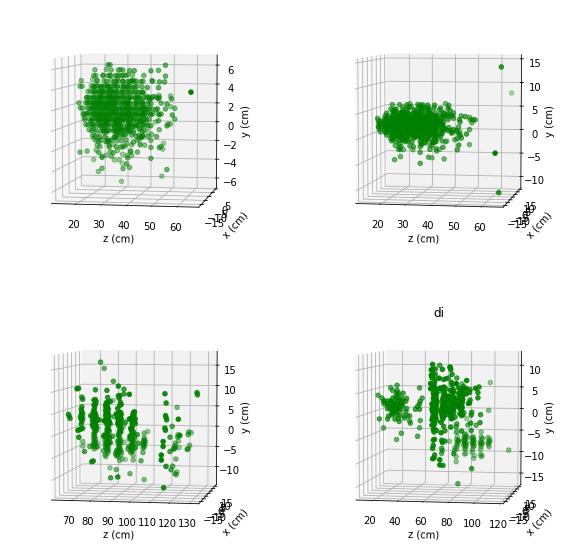

In [131]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron1, xx_positron1, yy_positron1, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 2, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron2, xx_positron2, yy_positron2, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')


ax = fig.add_subplot(2, 2, 3, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron3, xx_positron3, yy_positron3, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron4, xx_positron4, yy_positron4, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("di")

plt.show()

In [132]:
pion_shower_EH_lay_index = pion_lay_data.index[(pion_lay_data.shower_start_layer>28)]
pion_shower_EH_lay_index

Int64Index([    2,     5,     7,    10,    14,    17,    19,    21,    23,
               25,
            ...
            99477, 99479, 99481, 99484, 99485, 99486, 99490, 99496, 99498,
            99502],
           dtype='int64', name='entry', length=25881)

In [133]:
n1=7
n2=19
n3=99498
n4=99502

xx_pion1=pion_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]
yy_pion1=pion_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]
zz_pion1=pion_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]

xx_pion2=pion_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]
yy_pion2=pion_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]
zz_pion2=pion_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]

xx_pion3=pion_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]
yy_pion3=pion_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]
zz_pion3=pion_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]

xx_pion4=pion_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]
yy_pion4=pion_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]
zz_pion4=pion_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]

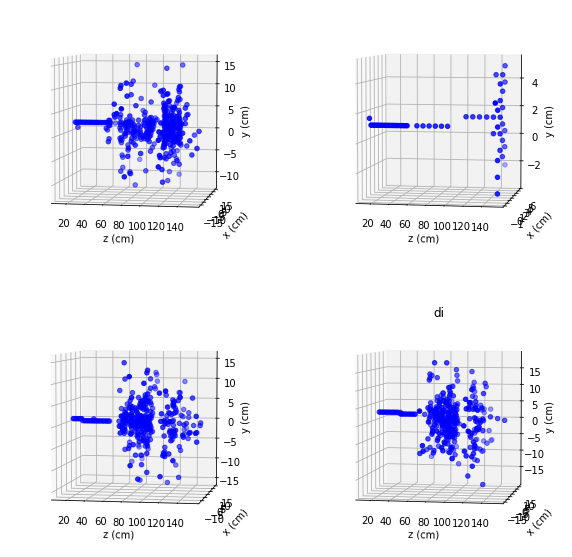

In [134]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion1, xx_pion1, yy_pion1, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 2, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion2, xx_pion2, yy_pion2, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')


ax = fig.add_subplot(2, 2, 3, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion3, xx_pion3, yy_pion3, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion4, xx_pion4, yy_pion4, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("di")

plt.show()

In [135]:
positron_shower_mip_lay_index = positron_lay_data.index[(positron_lay_data.shower_start_layer==0)]
positron_shower_mip_lay_index

Int64Index([8580, 24902, 25659, 74572, 85415, 91655], dtype='int64', name='entry')

In [136]:
n1=74572
n2=24902
n3=91655
n4=85415

xx_positron1=positron_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]
yy_positron1=positron_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]
zz_positron1=positron_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]

xx_positron2=positron_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]
yy_positron2=positron_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]
zz_positron2=positron_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]

xx_positron3=positron_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]
yy_positron3=positron_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]
zz_positron3=positron_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]

xx_positron4=positron_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]
yy_positron4=positron_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]
zz_positron4=positron_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]

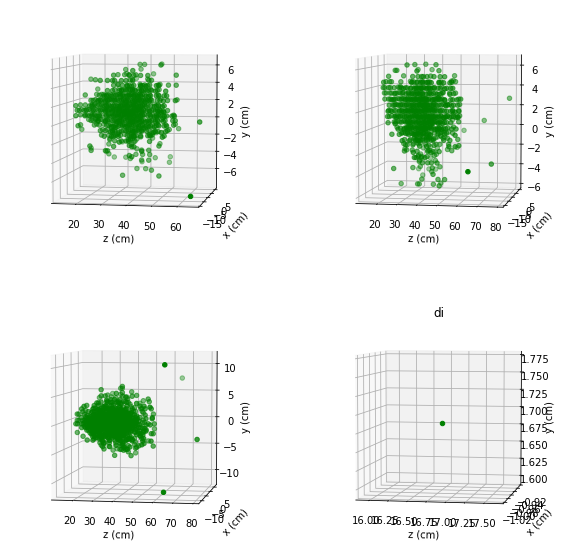

In [137]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron1, xx_positron1, yy_positron1, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 2, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron2, xx_positron2, yy_positron2, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')


ax = fig.add_subplot(2, 2, 3, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron3, xx_positron3, yy_positron3, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_positron4, xx_positron4, yy_positron4, color = "green",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("di")

plt.show()

In [138]:
pion_shower_EH_lay_index = pion_lay_data.index[(pion_lay_data.shower_start_layer==0)]
pion_shower_EH_lay_index

Int64Index([    8,     9,    24,    44,   160,   186,   190,   194,   204,
              228,
            ...
            99146, 99154, 99166, 99185, 99266, 99291, 99346, 99372, 99474,
            99482],
           dtype='int64', name='entry', length=2950)

In [139]:
n1=44
n2=160
n3=194
n4=99154

xx_pion1=pion_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]
yy_pion1=pion_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]
zz_pion1=pion_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n1,entrystop=n1+1, flatten=False).values[0,0]

xx_pion2=pion_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]
yy_pion2=pion_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]
zz_pion2=pion_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n2,entrystop=n2+1, flatten=False).values[0,0]

xx_pion3=pion_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]
yy_pion3=pion_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]
zz_pion3=pion_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n3,entrystop=n3+1, flatten=False).values[0,0]

xx_pion4=pion_data["rechitntupler/hits"].pandas.df(["rechit_x*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]
yy_pion4=pion_data["rechitntupler/hits"].pandas.df(["rechit_y*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]
zz_pion4=pion_data["rechitntupler/hits"].pandas.df(["rechit_z*"],entrystart=n4,entrystop=n4+1, flatten=False).values[0,0]

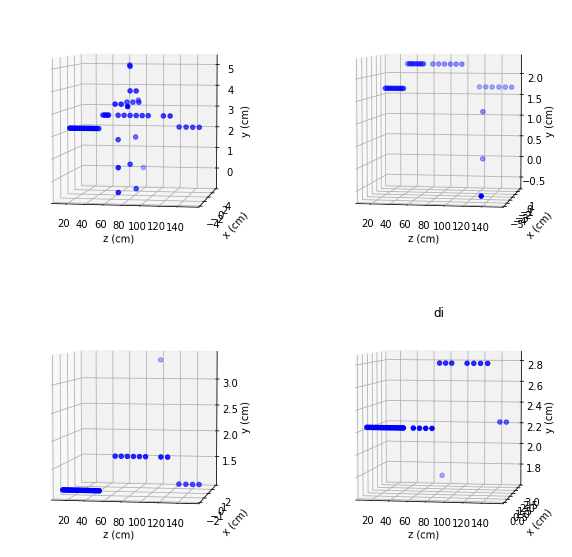

In [140]:
fig = plt.figure(figsize=(10,10))


ax = fig.add_subplot(2, 2, 1, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion1, xx_pion1, yy_pion1, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 2, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion2, xx_pion2, yy_pion2, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')


ax = fig.add_subplot(2, 2, 3, projection='3d') 
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion3, xx_pion3, yy_pion3, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')



ax = fig.add_subplot(2, 2, 4, projection='3d')
ax.view_init(elev=5,azim=-80)
ax.scatter3D(zz_pion4, xx_pion4, yy_pion4, color = "blue",label="Positron (100GeV)")
ax.set_xlabel('z (cm)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')

plt.title("di")

plt.show()

In [141]:
muon_shower_EH_lay = muon_lay_data.loc[(muon_lay_data.shower_start_layer>28)]
muon_total_E_deposit_shower_EH = np.array([sum(muon_shower_EH_lay.rechit_energy_layer.values[i]) for i in range(41317)])
print(muon_total_E_deposit_shower_EH)
muon_shower_EE_lay = muon_lay_data.loc[(muon_lay_data.shower_start_layer<29) & (muon_lay_data.shower_start_layer>0)]
muon_total_E_deposit_shower_EE = np.array([sum(muon_shower_EE_lay.rechit_energy_layer.values[i]) for i in range(43224)])
print(muon_total_E_deposit_shower_EE)
muon_shower_mip = muon_lay_data.loc[(muon_lay_data.shower_start_layer==0)]
muon_total_E_deposit_shower_mip = np.array([sum(muon_shower_mip.rechit_energy_layer.values[i]) for i in range(413466)])
muon_total_E_deposit_shower_mip

[  99.6519447  2618.33552113  187.97647308 ...  186.22408301   68.0429498
  107.89842105]
[ 136.28813516  313.68446189 7737.21790949 ...  164.11647695  400.53590229
  103.16290689]


array([58.77294326, 18.18623966, 55.16298914, ..., 36.42456144,
       63.3249653 , 65.66714429])

In [142]:
c= ROOT.TCanvas()

H_Muon_EE = ROOT.TH1F("Muon_EE"," Energy Deposited by Muon (200Gev); Energy Deposited (MIPS);No. of Events",100,0.5,250)
H_Muon_EH = ROOT.TH1F("Muon_EH"," Energy Deposited by Muon (200Gev); Energy Deposited (MIPS);No. of Events",100,0.5,250)
H_Muon_mip = ROOT.TH1F("Muon_mip"," Energy Deposited by Muon (200Gev); Energy Deposited (MIPS);No. of Events",100,0.5,250)
H_Muon_Total = ROOT.TH1F("Rechit_Total"," Energy Deposited by Muon (200Gev); Energy Deposited (MIPS);No. of Events",100,0.5,250)


for i in range(498007):
    H_Muon_Total.Fill(muon_total_E_deposit[i])
    
for i in range(413466):
    H_Muon_mip.Fill(muon_total_E_deposit_shower_mip[i])
    
for i in range(43224):
    H_Muon_EE.Fill(muon_total_E_deposit_shower_EE[i])
    
for i in range(41317):
    H_Muon_EH.Fill(muon_total_E_deposit_shower_EH[i])

H_Muon_Total.SetLineColor(1)
H_Muon_EE.SetLineColor(4)
H_Muon_EH.SetLineColor(6)
H_Muon_mip.SetLineColor(8)

H_Muon_Total.Draw()
H_Muon_EH.Draw("SAME")
H_Muon_EE.Draw("SAME")
H_Muon_mip.Draw("SAME")

legend = ROOT.TLegend();
legend.AddEntry("Rechit_Total","All Events","h");
legend.AddEntry("Muon_mip","mips","h");
legend.AddEntry("Muon_EH","Shower_start_EH","h");
legend.AddEntry("Muon_EE","Shower_start_EE","H");
legend.Draw();


#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Rechit_Total (Potential memory leak).


In [143]:
shower_start_lay = pion_lay_data.shower_start_layer.values
shower_start_lay

array([19,  6, 35, ..., 30, 20,  4])

In [144]:
pion_shower_start_fract_per_lay = np.array([list(shower_start_lay).count(i+1) for i in range(40)]) / 99505
(pion_shower_start_fract_per_lay)

array([0.07750364, 0.04483192, 0.03297322, 0.03802824, 0.03073212,
       0.03432993, 0.02804884, 0.03264158, 0.02519471, 0.02918446,
       0.02415959, 0.02707402, 0.02156676, 0.02553641, 0.02018994,
       0.02358675, 0.01880308, 0.02076278, 0.01538616, 0.01869253,
       0.01450178, 0.02051153, 0.01511482, 0.01865233, 0.01346666,
       0.01467263, 0.01196925, 0.01214009, 0.05893171, 0.04570625,
       0.03506356, 0.02867193, 0.02237074, 0.01690367, 0.01835084,
       0.01022059, 0.00907492, 0.00602985, 0.00480378, 0.00396965])

In [145]:
lambda_pion_40_lay

array([0.0424903, 0.0942989, 0.123714 , 0.175523 , 0.204938 , 0.256746 ,
       0.286162 , 0.33797  , 0.367385 , 0.419194 , 0.448609 , 0.500418 ,
       0.529833 , 0.581641 , 0.611057 , 0.662865 , 0.69228  , 0.744089 ,
       0.773504 , 0.825313 , 0.854728 , 0.919502 , 0.948918 , 1.01369  ,
       1.04311  , 1.10416  , 1.13357  , 1.1959   , 1.4419   , 1.68425  ,
       1.9266   , 2.16894  , 2.41129  , 2.64702  , 2.97765  , 3.22     ,
       3.46235  , 3.70777  , 3.94672  , 4.18258  ])

In [146]:
0.0942989-0.0424903

0.0518086

In [147]:
lambda_btw_lay = np.array([0.0424903]+[(lambda_pion_40_lay[i+1]-lambda_pion_40_lay[i]) for i in range(39)])
lambda_btw_lay

array([0.0424903, 0.0518086, 0.0294151, 0.051809 , 0.029415 , 0.051808 ,
       0.029416 , 0.051808 , 0.029415 , 0.051809 , 0.029415 , 0.051809 ,
       0.029415 , 0.051808 , 0.029416 , 0.051808 , 0.029415 , 0.051809 ,
       0.029415 , 0.051809 , 0.029415 , 0.064774 , 0.029416 , 0.064772 ,
       0.02942  , 0.06105  , 0.02941  , 0.06233  , 0.246    , 0.24235  ,
       0.24235  , 0.24234  , 0.24235  , 0.23573  , 0.33063  , 0.24235  ,
       0.24235  , 0.24542  , 0.23895  , 0.23586  ])

In [148]:
dist_btw_lay = np.array([2.0149994]+[(lay_loc_z[i+1]-lay_loc_z[i]) for i in range(39)])
dist_btw_lay

array([ 2.0149994 ,  0.89000034,  2.01499939,  0.8900013 ,  2.01499939,
        0.88999939,  2.11499977,  0.8900013 ,  2.11499977,  0.88999939,
        2.11499977,  0.8900013 ,  1.91499901,  0.88999939,  1.91500092,
        0.88999939,  1.91500092,  0.88999939,  1.91500092,  0.88999939,
        2.09500122,  1.12999725,  2.375     ,  1.13000107,  2.13949966,
        1.00600052,  2.19350052,  1.02199936, 10.71500015,  6.70749664,
        6.70750427,  6.80750275,  6.70749664,  6.6875    , 16.91699982,
        7.40799713,  7.40799713,  7.82701111,  7.40699768,  7.30799866])

In [149]:
pion_shower_start_fract_per_lay/lambda_btw_lay

array([1.82403144, 0.86533738, 1.12096228, 0.73400837, 1.04477729,
       0.66263768, 0.95352331, 0.63004895, 0.85652605, 0.56330875,
       0.82133571, 0.52257361, 0.73318903, 0.49290467, 0.68635913,
       0.45527244, 0.63923424, 0.40075616, 0.52307195, 0.36079693,
       0.49300642, 0.31666305, 0.51382983, 0.28796901, 0.45773827,
       0.24033791, 0.40697884, 0.19477127, 0.2395598 , 0.18859602,
       0.14468151, 0.11831281, 0.09230755, 0.07170777, 0.05550264,
       0.04217286, 0.03744552, 0.0245695 , 0.0201037 , 0.01683053])

In [150]:
new_pion_shower_start_fract_per_lay = np.array(list([(pion_shower_start_fract_per_lay[2*i] + pion_shower_start_fract_per_lay[2*i+1]) for i in range(14)]) + list(pion_shower_start_fract_per_lay[28:]))
print(new_pion_shower_start_fract_per_lay)
new_lambda_btw_lay = np.array(list([(lambda_btw_lay[2*i] + lambda_btw_lay[2*i+1]) for i in range(14)]) + list(lambda_btw_lay[28:]))
print(new_lambda_btw_lay)
new_dist_btw_lay = np.array(list([(dist_btw_lay[2*i] + dist_btw_lay[2*i+1]) for i in range(14)]) + list(dist_btw_lay[28:]))
print(new_dist_btw_lay)

[0.12233556 0.07100146 0.06506206 0.06069042 0.05437918 0.05123361
 0.04710316 0.04377669 0.03956585 0.03407869 0.03501332 0.03376715
 0.02813929 0.02410934 0.05893171 0.04570625 0.03506356 0.02867193
 0.02237074 0.01690367 0.01835084 0.01022059 0.00907492 0.00602985
 0.00480378 0.00396965]
[0.0942989 0.0812241 0.081223  0.081224  0.081224  0.081224  0.081223
 0.081224  0.081224  0.081224  0.094189  0.094188  0.09047   0.09174
 0.246     0.24235   0.24235   0.24234   0.24235   0.23573   0.33063
 0.24235   0.24235   0.24542   0.23895   0.23586  ]
[ 2.90499974  2.90500069  2.90499878  3.00500107  3.00499916  3.00500107
  2.8049984   2.80500031  2.80500031  2.80500031  3.22499847  3.50500107
  3.14550018  3.21549988 10.71500015  6.70749664  6.70750427  6.80750275
  6.70749664  6.6875     16.91699982  7.40799713  7.40799713  7.82701111
  7.40699768  7.30799866]


In [151]:
new_lambda_pion = np.array(list([lambda_pion_40_lay[2*i+1] for i in range(14)])+list(lambda_pion_40_lay[28:]))
new_lambda_pion

array([0.0942989, 0.175523 , 0.256746 , 0.33797  , 0.419194 , 0.500418 ,
       0.581641 , 0.662865 , 0.744089 , 0.825313 , 0.919502 , 1.01369  ,
       1.10416  , 1.1959   , 1.4419   , 1.68425  , 1.9266   , 2.16894  ,
       2.41129  , 2.64702  , 2.97765  , 3.22     , 3.46235  , 3.70777  ,
       3.94672  , 4.18258  ])

In [152]:
new_pion_shower_start_fract_per_lay/new_lambda_btw_lay

array([1.29731695, 0.87414274, 0.80102997, 0.74719809, 0.66949642,
       0.63076931, 0.57992392, 0.53896256, 0.4871202 , 0.41956429,
       0.37173466, 0.35850796, 0.31103448, 0.26280075, 0.2395598 ,
       0.18859602, 0.14468151, 0.11831281, 0.09230755, 0.07170777,
       0.05550264, 0.04217286, 0.03744552, 0.0245695 , 0.0201037 ,
       0.01683053])

In [153]:
sum(pion_data["rechitntupler/hits"].pandas.df(["ahc_hitEnergy"], flatten=False).values[0,0])

282.68598157167435

In [154]:
pion_data["rechitntupler/hits"].pandas.df(["ahc_n*"], flatten=False)

,ahc_nHits,ahc_nLayers,ahc_nHits5Layer,ahc_nHitsPerLayer
entry,,,,
0,106,39,66,"[16, 21, 13, 10, 6, 6, 4, 2, 2, 2, 6, 3, 2, 2,..."
1,39,39,11,"[1, 3, 4, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 1, 3, ..."
2,34,39,30,"[15, 3, 9, 1, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,45,39,2,"[1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 3, 3, ..."
4,55,39,27,"[4, 3, 8, 7, 5, 3, 3, 2, 5, 1, 3, 3, 1, 1, 0, ..."
...,...,...,...,...
99500,82,39,38,"[8, 8, 9, 6, 7, 9, 5, 7, 5, 4, 3, 3, 2, 1, 2, ..."
99501,22,39,11,"[3, 2, 2, 2, 2, 4, 3, 1, 0, 0, 1, 1, 1, 0, 0, ..."
99502,67,39,10,"[1, 2, 2, 2, 3, 6, 6, 8, 7, 5, 3, 1, 4, 2, 2, ..."


In [155]:
ahc_energySum_pion = pion_data["rechitntupler/hits"].pandas.df(["ahc_energySum"], flatten=False)
ahc_energySum_pion_array=ahc_energySum_pion.values
ahc_energySum_pion_array[0]

array([282.68597], dtype=float32)

In [156]:
ahc_energySum_positron = positron_data["rechitntupler/hits"].pandas.df(["ahc_energySum"], flatten=False)
ahc_energySum_positron_array=ahc_energySum_positron.values

In [157]:
pion_total_E_deposit_shower_EE

array([3311.52973938, 3183.70199627, 2570.20942718, ..., 1796.02462941,
       1985.97656155, 5020.41979403])

In [158]:
pion_shower_index_EE = pion_lay_data.index[(pion_lay_data.shower_start_layer>0) & (pion_lay_data.shower_start_layer<29)]
ahc_energySum_pion_shower_EE = ahc_energySum_pion.iloc[pion_shower_index_EE].values
ahc_energySum_pion_shower_EE = ahc_energySum_pion_shower_EE.reshape((70674,))
ahc_energySum_pion_shower_EE

array([282.68597 , 121.26858 , 203.44177 , ...,  77.68342 , 116.33453 ,
        12.872445], dtype=float32)

In [159]:
pion_shower_index_FH = pion_lay_data.index[(pion_lay_data.shower_start_layer>28)]
ahc_energySum_pion_shower_FH = ahc_energySum_pion.iloc[pion_shower_index_FH].values
ahc_energySum_pion_shower_FH = ahc_energySum_pion_shower_FH.reshape((25881,))
ahc_energySum_pion_shower_FH

array([  75.92338,  347.36514,   63.31187, ..., 2668.3735 ,  728.6585 ,
        269.74545], dtype=float32)

In [160]:
pion_shower_index_mips = pion_lay_data.index[(pion_lay_data.shower_start_layer==0)]
ahc_energySum_pion_mips = ahc_energySum_pion.iloc[pion_shower_index_mips].values
ahc_energySum_pion_mips = ahc_energySum_pion_mips.reshape((2950,))
ahc_energySum_pion_mips

array([2578.4167 ,   69.36444, 3035.8865 , ..., 3187.3657 , 3739.2866 ,
       2197.2878 ], dtype=float32)

In [161]:
total_rechit_pion_shower_EE = pion_total_E_deposit_shower_EE+ahc_energySum_pion_shower_EE
total_rechit_pion_shower_FH = pion_total_E_deposit_shower_EH+ahc_energySum_pion_shower_FH
total_rechit_pion_shower_mips = pion_total_E_deposit_shower_mip+ahc_energySum_pion_mips

In [162]:
%jsroot on
c = ROOT.TCanvas()


H_pion_EE = ROOT.TH1F("Pion_EE"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)
H_pion_FH = ROOT.TH1F("Pion_FH"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)
H_pion_Total = ROOT.TH1F("Rechit_Total"," Energy Recorded (100Gev Pion); Energy Deposited (MIPS);No. of Events",100,0.5,11500)
H_pion_mip = ROOT.TH1F("Pion_mip"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)

for i in range(99505):
    H_pion_Total.Fill((pion_total_E_deposit[i]+ahc_energySum_pion_array[i]))
    
for i in range(70674):
    H_pion_EE.Fill(total_rechit_pion_shower_EE[i])
    
for i in range(25881):
    H_pion_FH.Fill(total_rechit_pion_shower_FH[i])
    
for i in range(2950):
    H_pion_mip.Fill(total_rechit_pion_shower_mips[i])

H_pion_Total.SetLineColor(1)
H_pion_EE.SetLineColor(4)
H_pion_FH.SetLineColor(6)
H_pion_mip.SetLineColor(7)

H_pion_Total.Draw()
H_pion_FH.Draw("SAME")
H_pion_EE.Draw("SAME")
H_pion_mip.Draw("SAME")

legend = ROOT.TLegend();
legend.AddEntry("Rechit_Total","All Events","h");
legend.AddEntry("Pion_FH","Shower_start_FH","h");
legend.AddEntry("Pion_EE","Shower_start_EE","H");
legend.AddEntry("Pion_mip","mips","H")
legend.Draw();


#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Pion_EE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Rechit_Total (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Pion_mip (Potential memory leak).


In [163]:
c = ROOT.TCanvas()

ahc_energy_pion = ROOT.TH1F("Total_energy_pion","Total_enrgy_distribution;energy;nuber of events",100,-100,12000)

for i in range(96140):
    ahc_energy_pion.Fill(ahc_energySum_positron_array[i]+positron_total_E_deposit[i])
    
ahc_energy_pion.Draw()

c.Draw()

In [164]:
# for 100GeV positron, scale(CEE) = 0.0106 GeV/MIP

# for 100Gev pion
    #relative weight = 0.4(for AH cpmared to FH)
    #scale(CFH) = 0.0789 GeV/MIP

In [165]:
print(pion_E_deposit_EE_shower_EE)
print(pion_E_deposit_EH_shower_EE)
print(ahc_energySum_pion_shower_EE)

[2595.76136472 2591.76064781 1632.85899851 ...  839.8260813   748.24772692
 4160.13281633]
[ 715.76837466  591.94134845  937.35042867 ...  956.19854811 1237.72883464
  860.28697771]
[282.68597  121.26858  203.44177  ...  77.68342  116.33453   12.872445]


In [166]:
print(pion_E_deposit_EE_shower_EH)
print(pion_E_deposit_EH_shower_EH)
print(ahc_energySum_pion_shower_FH)

[87.22484994 63.67905003 76.67394835 ... 55.44257158 44.28505689
 40.01190317]
[2129.2904266  1039.68875667 1684.56362556 ...  630.29081249  925.88980512
 1272.78190907]
[  75.92338  347.36514   63.31187 ... 2668.3735   728.6585   269.74545]


In [167]:
print(pion_E_deposit_EE_shower_EH)
print(pion_E_deposit_EH_shower_EH)
print(ahc_energySum_pion_mips)

[87.22484994 63.67905003 76.67394835 ... 55.44257158 44.28505689
 40.01190317]
[2129.2904266  1039.68875667 1684.56362556 ...  630.29081249  925.88980512
 1272.78190907]
[2578.4167    69.36444 3035.8865  ... 3187.3657  3739.2866  2197.2878 ]


In [168]:
pion_reco_energy_shower_EE = (0.0106*pion_E_deposit_EE_shower_EE) + 0.0789*(pion_E_deposit_EH_shower_EE + 0.4*ahc_energySum_pion_shower_EE)
pion_reco_energy_shower_EE

array([ 92.91076493,  78.00407157,  97.68587655, ...,  86.79791065,
       109.25974884, 112.38030478])

In [169]:
pion_reco_energy_shower_FH = (0.0106*pion_E_deposit_EE_shower_EH) + 0.0789*(pion_E_deposit_EH_shower_EH + 0.4*ahc_energySum_pion_shower_FH)
pion_reco_energy_shower_FH

array([171.32173997,  93.66928498, 135.7229366 , ..., 134.53151091,
        96.51859023, 109.35978565])

In [170]:
c = ROOT.TCanvas()


H_pion_EE = ROOT.TH1F("Pion_EE"," Caliberated Energy, Pion (100Gev); Energy  (GeV);No. of Events",100,0,300)
H_pion_EH = ROOT.TH1F("Pion_EH"," Caliberated Energy, Pion (100Gev); Energy (GeV);No. of Events",100,0,300)
H_pion_Total = ROOT.TH1F("All Events"," Caliberated Energy, Pion (100Gev); Energy  (GeV);No. of Events",100,0,300)
#H_pion_mip = ROOT.TH1F("Pion_mip"," Energy Deposited by Pion (100Gev); Energy Deposited (MIPS);No. of Events",100,0.5,11500)

    
for i in range(70674):
    H_pion_EE.Fill(pion_reco_energy_shower_EE[i])
    H_pion_Total.Fill(pion_reco_energy_shower_EE[i])
    
for i in range(25881):
    H_pion_EH.Fill(pion_reco_energy_shower_FH[i])
    H_pion_Total.Fill(pion_reco_energy_shower_FH[i])
    

H_pion_Total.SetLineColor(1)
H_pion_EE.SetLineColor(4)
H_pion_EH.SetLineColor(6)
#H_pion_mip.SetLineColor(7)

H_pion_Total.Draw()
H_pion_EH.Draw("SAME")
H_pion_EE.Draw("SAME")
#H_pion_mip.Draw("SAME")

legend = ROOT.TLegend();
legend.AddEntry("All Events","All Events","h");
legend.AddEntry("Pion_EE","Shower_start_EE","H");
legend.AddEntry("Pion_EH","Shower_start_FH","h");

#legend.AddEntry("Pion_mip","mips","H")
legend.Draw();


#ROOT.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Pion_EE (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: Pion_EH (Potential memory leak).


In [171]:
print(positron_total_E_deposit_EE)

[10061.10520354 10233.92040719 10649.17501112 ... 10363.81844926
  9864.27004182 10124.82403749]


In [172]:
c = ROOT.TCanvas()

h1 = ROOT.TH1F("100 GeV Positron","Caliberated Energy, Positron(100GeV);Energy (GeV);Number of events",100,50,150)

for i in range(96140):
    #if positron_total_E_deposit_EE[i]>8000:
        h1.Fill(0.0106*positron_total_E_deposit_EE[i]+0.0789*positron_total_E_deposit_EH[i])
    
h1.Draw()

c.Draw()

In [173]:
100/10227

0.00977803852547179

In [174]:
c = ROOT.TCanvas()

ahc_energy_pion = ROOT.TH1F("Total_energy_pion","Total_enrgy_distribution;energy;nuber of events",100,-100,1200)

for i in range(25881):
    ahc_energy_pion.Fill(pion_E_deposit_EE_shower_EH[i])
    
ahc_energy_pion.Draw()

c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: Total_energy_pion (Potential memory leak).


In [175]:
pion_energy_layer = np.stack(pion_lay_data.rechit_energy_layer.values)
print(pion_energy_layer)

[[  1.07156467   0.99555194   0.79866993 ...   2.12568867   2.09969443
   36.85134184]
 [  1.83952093   0.94343525  10.03840768 ...   0.           0.
    0.        ]
 [  1.03179419   1.13442731   1.93315959 ... 356.91414194 171.27431503
   64.5758467 ]
 ...
 [  1.23447108   2.85476041   0.97968298 ...   0.84382278   1.07886302
    1.02995837]
 [  3.17904425   1.11126506  13.11855793 ...  23.56098296  10.81806803
    0.7697373 ]
 [ 10.60670495   0.82226473  12.04975414 ...  25.87991595  70.26820606
   22.57597235]]


In [176]:
#21989
pion_cal_EE_lay_energy = 0.0106*pion_energy_layer[:,:28]
pion_cal_EE_lay_energy = np.delete(pion_cal_EE_lay_energy,21989,0)
pion_cal_EE_lay_energy

array([[0.01135859, 0.01055285, 0.0084659 , ..., 4.25291918, 3.820745  ,
        3.22111496],
       [0.01949892, 0.01000041, 0.10640712, ..., 0.69673875, 0.23797963,
        0.93612245],
       [0.01093702, 0.01202493, 0.02049149, ..., 0.01098888, 0.00988938,
        0.00951288],
       ...,
       [0.01308539, 0.03026046, 0.01038464, ..., 0.01405868, 0.00817549,
        0.01563932],
       [0.03369787, 0.01177941, 0.13905671, ..., 1.19982841, 2.34681831,
        2.22692906],
       [0.11243107, 0.00871601, 0.12772739, ..., 0.58574664, 1.46930686,
        1.01691628]])

In [177]:
pion_cal_FH_lay_energy = 0.0789*pion_energy_layer[:,28:]
pion_cal_FH_lay_energy = np.delete(pion_cal_FH_lay_energy,21989,0)
pion_cal_FH_lay_energy

array([[16.72631091, 11.25010129,  8.399226  , ...,  0.16771684,
         0.16566589,  2.90757087],
       [ 1.11774555,  2.69251757, 13.42679075, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07090345,  0.06492137,  0.12044014, ..., 28.1605258 ,
        13.51354346,  5.0950343 ],
       ...,
       [ 0.77451146,  4.87471601, 23.36783048, ...,  0.06657762,
         0.08512229,  0.08126372],
       [27.74837644, 14.66096716,  7.25100445, ...,  1.85896156,
         0.85354557,  0.06073227],
       [ 3.08629716,  1.56052605, 10.52608659, ...,  2.04192537,
         5.54416146,  1.78124422]])

In [178]:
pion_total_energyGeV_EE_FH = np.sum(pion_cal_EE_lay_energy,axis=1) + np.sum(pion_cal_FH_lay_energy,axis=1)
pion_total_energyGeV_EE_FH

array([ 83.98919523,  74.17683526, 168.92559807, ..., 100.8466188 ,
       105.58823096, 111.97405039])

In [179]:
mean_frac_energy_FH_lay = sum(pion_cal_FH_lay_energy/pion_total_energyGeV_EE_FH.reshape(99504,1))/99504
mean_frac_energy_FH_lay

array([0.07743301, 0.080894  , 0.08041373, 0.07700359, 0.07130541,
       0.06768819, 0.05368759, 0.04574315, 0.04876259, 0.02924512,
       0.02590917, 0.02701667])

In [180]:
mean_frac_energy_EE_lay = sum(pion_cal_EE_lay_energy/pion_total_energyGeV_EE_FH.reshape(99504,1))/99504
mean_frac_energy_EE_lay

array([0.00138038, 0.0021125 , 0.00322501, 0.00429336, 0.00605779,
       0.00712597, 0.00915563, 0.0097167 , 0.01177514, 0.01175381,
       0.01363062, 0.01313339, 0.01478312, 0.01393042, 0.01534955,
       0.01426916, 0.01552784, 0.01431516, 0.01542272, 0.01409668,
       0.01391365, 0.01309618, 0.01329597, 0.0125739 , 0.01378219,
       0.01244472, 0.0132858 , 0.0114504 ])

In [181]:
np.array(list(mean_frac_energy_EE_lay)+list(mean_frac_energy_FH_lay))

array([0.00138038, 0.0021125 , 0.00322501, 0.00429336, 0.00605779,
       0.00712597, 0.00915563, 0.0097167 , 0.01177514, 0.01175381,
       0.01363062, 0.01313339, 0.01478312, 0.01393042, 0.01534955,
       0.01426916, 0.01552784, 0.01431516, 0.01542272, 0.01409668,
       0.01391365, 0.01309618, 0.01329597, 0.0125739 , 0.01378219,
       0.01244472, 0.0132858 , 0.0114504 , 0.07743301, 0.080894  ,
       0.08041373, 0.07700359, 0.07130541, 0.06768819, 0.05368759,
       0.04574315, 0.04876259, 0.02924512, 0.02590917, 0.02701667])

In [182]:
positron_energy_layer = np.stack(positron_lay_data.rechit_energy_layer.values)
print(positron_energy_layer)

[[ 38.92030928 112.02702224 338.66196008 ...   0.           0.
    0.        ]
 [  4.61559391  21.51336062 134.24929333 ...   0.           0.
    0.        ]
 [ 21.99822837  96.83178961 274.12790906 ...   0.           0.
    0.        ]
 ...
 [  6.7664479   39.79092723  82.10875046 ...   0.           0.
    0.        ]
 [ 14.77609634  58.36149234 177.36664432 ...   0.           0.
    0.        ]
 [ 16.18105519  94.95234281 123.30260587 ...   0.           0.
    0.        ]]


In [183]:
positron_cal_EE_lay_energy = 0.0106*positron_energy_layer[:,:28]
positron_cal_EE_lay_energy = positron_cal_EE_lay_energy
positron_cal_EE_lay_energy.shape

(96140, 28)

In [184]:
positron_cal_FH_lay_energy = 0.0789*positron_energy_layer[:,28:]
positron_cal_FH_lay_energy = positron_cal_FH_lay_energy
positron_cal_FH_lay_energy

array([[0.77840298, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41068492, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.31232439, 0.49208101, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.17808887, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.68236585, 1.26580473, 0.11173408, ..., 0.        , 0.        ,
        0.        ]])

In [185]:
positron_total_energyGeV_EE_FH = np.sum(positron_cal_EE_lay_energy,axis=1) + np.sum(positron_cal_FH_lay_energy,axis=1)
positron_total_energyGeV_EE_FH

array([107.42611814, 108.47955632, 113.29194003, ..., 110.66088096,
       104.73935131, 109.38303946])

In [186]:
positron_mean_frac_energy_FH_lay = sum(positron_cal_FH_lay_energy/positron_total_energyGeV_EE_FH.reshape(96140,1))/96140
positron_mean_frac_energy_EE_lay = sum(positron_cal_EE_lay_energy/positron_total_energyGeV_EE_FH.reshape(96140,1))/96140
np.array(list(positron_mean_frac_energy_EE_lay)+list(positron_mean_frac_energy_FH_lay))

array([3.33756708e-03, 9.90992228e-03, 2.42027537e-02, 3.85620144e-02,
       6.21797217e-02, 7.17689467e-02, 9.21844743e-02, 8.78454724e-02,
       9.79678113e-02, 8.25419194e-02, 8.39623833e-02, 6.54594203e-02,
       6.24276651e-02, 4.58848265e-02, 4.18544834e-02, 2.95150205e-02,
       2.60726364e-02, 1.77966392e-02, 1.53283540e-02, 1.02304324e-02,
       7.62856774e-03, 5.02083845e-03, 3.81822579e-03, 2.49099258e-03,
       2.15625556e-03, 1.28745886e-03, 1.05822196e-03, 5.91310740e-04,
       4.81715883e-03, 1.37624962e-03, 4.35123180e-04, 1.56967678e-04,
       6.21620645e-05, 3.04141153e-05, 1.07359204e-05, 7.01010542e-06,
       6.24141846e-06, 5.49476398e-06, 4.67086935e-06, 3.43535722e-06])

In [187]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH2D("h2","Pion (100Gev); EE_Energy (GeV); FH_Energy (GeV)",100, 0.0, 120,100, 0, 300)

for i in range(70674):
    H_pion.Fill(0.0106*pion_E_deposit_EE_shower_EE[i], 0.0789*pion_E_deposit_EH_shower_EE[i])
    
for i in range(25881):
    H_pion.Fill(0.0106*pion_E_deposit_EE_shower_EH[i], 0.0789*pion_E_deposit_EH_shower_EH[i])
    
H_pion.Draw("COLZ")
c1.Draw()

In [245]:
pion_index_shower_EE = list(pion_lay_data.loc[(pion_lay_data.shower_start_layer<28) & (pion_lay_data.shower_start_layer>0)].index)
pion_cal_EE_lay_energy_shower_EE = 0.0106*pion_energy_layer[pion_index_shower_EE,:28]
pion_cal_FH_lay_energy_shower_EE = 0.0789*pion_energy_layer[pion_index_shower_EE,28:]

In [246]:
pion_index_shower_FH = list(pion_lay_data.loc[(pion_lay_data.shower_start_layer>27)].index)
pion_cal_EE_lay_energy_shower_FH = 0.0106*pion_energy_layer[pion_index_shower_FH,:28]
pion_cal_FH_lay_energy_shower_FH = 0.0789*pion_energy_layer[pion_index_shower_FH,28:]

In [247]:
1-(len(pion_index_shower_EE)/99504)

0.30187731146486574

In [248]:
pion_total_energyGeV_EE_FH_shower_EE = np.sum(pion_cal_EE_lay_energy_shower_EE,axis=1) + np.sum(pion_cal_FH_lay_energy_shower_EE,axis=1)
mean_frac_energy_FH_lay_shower_EE = sum(pion_cal_FH_lay_energy_shower_EE/pion_total_energyGeV_EE_FH_shower_EE.reshape(69466,1))/69466
mean_frac_energy_EE_lay_shower_EE = sum(pion_cal_EE_lay_energy_shower_EE/pion_total_energyGeV_EE_FH_shower_EE.reshape(69466,1))/69466
np.array(list(mean_frac_energy_EE_lay_shower_EE)+list(mean_frac_energy_FH_lay_shower_EE))

array([0.00155285, 0.00259134, 0.0041538 , 0.00571036, 0.00820881,
       0.00974197, 0.01262223, 0.01344363, 0.01637733, 0.01635843,
       0.01901139, 0.01834058, 0.02067209, 0.01946521, 0.0214848 ,
       0.01995182, 0.02173135, 0.02001011, 0.02158196, 0.01969532,
       0.01943103, 0.01825662, 0.01853341, 0.01749649, 0.01919917,
       0.01731457, 0.0184679 , 0.01573276, 0.0988343 , 0.08991495,
       0.07728985, 0.06590635, 0.0562623 , 0.04948542, 0.03501316,
       0.02781418, 0.02871738, 0.01322886, 0.01073567, 0.00966023])

In [249]:
pion_total_energyGeV_EE_FH_shower_FH = np.sum(pion_cal_EE_lay_energy_shower_FH,axis=1) + np.sum(pion_cal_FH_lay_energy_shower_FH,axis=1)
mean_frac_energy_FH_lay_shower_FH = sum(pion_cal_FH_lay_energy_shower_FH/pion_total_energyGeV_EE_FH_shower_FH.reshape(27089,1))/27089
mean_frac_energy_EE_lay_shower_FH = sum(pion_cal_EE_lay_energy_shower_FH/pion_total_energyGeV_EE_FH_shower_FH.reshape(27089,1))/27089
np.array(list(mean_frac_energy_EE_lay_shower_FH)+list(mean_frac_energy_FH_lay_shower_FH))

array([0.0002669 , 0.00027077, 0.00029055, 0.00028919, 0.00030628,
       0.00030311, 0.00031814, 0.00031827, 0.00033424, 0.00032693,
       0.00033944, 0.00033269, 0.00034819, 0.00033378, 0.00034962,
       0.00035048, 0.0003699 , 0.00035304, 0.00037091, 0.0003613 ,
       0.00036099, 0.00036468, 0.00036844, 0.00036994, 0.00038746,
       0.00039172, 0.00044104, 0.00076663, 0.02404642, 0.05964547,
       0.09021712, 0.10695472, 0.11084228, 0.11494422, 0.10069032,
       0.08986454, 0.09824428, 0.06665819, 0.06076603, 0.06714178])

In [193]:
pion_total_ecal_energy = np.sum(pion_cal_EE_lay_energy, axis=1)
pion_total_hcal_energy = np.sum(pion_cal_FH_lay_energy, axis=1)
pion_total_hcal_energy.shape

(99504,)

In [194]:
positron_total_ecal_energy = np.sum(positron_cal_EE_lay_energy, axis=1)
positron_total_hcal_energy = np.sum(positron_cal_FH_lay_energy, axis=1)
positron_total_hcal_energy.shape

(96140,)

In [195]:
list((positron_total_hcal_energy/positron_total_ecal_energy)>10).index(1)

<ipython-input-195-20c040c29e12>:1: RuntimeWarning: divide by zero encountered in true_divide
  list((positron_total_hcal_energy/positron_total_ecal_energy)>10).index(1)


60834

In [196]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",10, 0, 2)
H_positron = ROOT.TH1F("H_positron","Energy_HCAL/Energy_ECAL; Energy_HCAL/Energy_ECAL; Normalized Entries",100, 0, 2)

for i in range(99504):
    H_pion.Fill(pion_total_hcal_energy[i]/pion_total_ecal_energy[i])
    
for i in range(96140):
    H_positron.Fill(positron_total_hcal_energy[i]/positron_total_ecal_energy[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)

H_positron.DrawNormalized()
H_pion.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");
legend.Draw();

#ROOT.gPad.SetLogx()
c1.Draw()

<ipython-input-196-c49fa1f3580f>:6: RuntimeWarning: divide by zero encountered in double_scalars
  H_pion.Fill(pion_total_hcal_energy[i]/pion_total_ecal_energy[i])
<ipython-input-196-c49fa1f3580f>:9: RuntimeWarning: divide by zero encountered in double_scalars
  H_positron.Fill(positron_total_hcal_energy[i]/positron_total_ecal_energy[i])


In [197]:
pion_xy_data=pion_data["rechitntupler/hits"].pandas.df(["rechit_x*","rechit_y*"], flatten=False)
pion_xy_data["std_x"] = pion_xy_data.rechit_x.map(lambda x : np.std(x))
pion_xy_data["std_y"] = pion_xy_data.rechit_y.map(lambda x : np.std(x))
pion_xy_data

/home/nitish/.local/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/nitish/.local/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/nitish/.local/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


,rechit_x,rechit_y,std_x,std_y
entry,,,,
0,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...",4.083595,4.469898
1,"[-1.9435272, -1.9435272, -1.9435272, -3.887054...","[1.122096, 1.122096, 1.122096, -1.122096, 1.12...",4.118141,3.292707
2,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.683...",3.263603,3.004740
3,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[2.244192, 2.244192, 2.244192, 2.244192, 2.244...",4.249429,4.827249
4,"[0.0, -0.9717636, -0.9717636, -1.9435272, -3.8...","[1.122096, 1.683144, 0.561048, 1.122096, 1.122...",2.821526,2.803826
...,...,...,...,...
99500,"[-0.9717636, -0.9717636, -1.9435272, -1.943527...","[-0.561048, 0.561048, 1.122096, 0.0, -0.561048...",2.849999,2.730911
99501,"[-1.9435272, -1.9435272, -1.9435272, -1.943527...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...",5.500335,4.357064
99502,"[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[2.80524, 2.80524, 2.80524, 2.80524, 2.80524, ...",5.303751,5.517013


In [198]:
positron_xy_data=positron_data["rechitntupler/hits"].pandas.df(["rechit_x*","rechit_y*"], flatten=False)
positron_xy_data["std_x"] = positron_xy_data.rechit_x.map(lambda x : np.std(x))
positron_xy_data["std_y"] = positron_xy_data.rechit_y.map(lambda x : np.std(x))
positron_xy_data

,rechit_x,rechit_y,std_x,std_y
entry,,,,
0,"[-0.9717636, -0.9717636, -2.9152908, -2.915290...","[1.683144, 0.561048, 1.683144, 0.561048, 1.122...",2.427076,2.309780
1,"[-1.9435272, -1.9435272, -1.9435272, -2.915290...","[2.244192, 2.244192, 1.122096, 2.80524, -1.122...",2.190529,2.308517
2,"[0.0, -0.9717636, -1.9435272, -3.8870544, 0.97...","[1.122096, 1.683144, 1.122096, 0.0, 0.561048, ...",2.378296,2.377697
3,"[-0.9717636, -1.9435272, -1.9435272, -1.943527...","[0.561048, 2.244192, 1.122096, 0.0, -2.80524, ...",2.521133,2.265338
4,"[-1.9435272, -1.9435272, -2.9152908, 3.8870544...","[1.122096, 0.0, 0.561048, -1.122096, -2.244192...",2.385572,2.417429
...,...,...,...,...
96135,"[0.0, -0.9717636, -0.9717636, -1.9435272, -2.9...","[1.122096, 1.683144, 1.683144, 1.122096, 1.683...",2.385014,2.385780
96136,"[-0.9717636, -0.9717636, -1.9435272, -2.915290...","[1.683144, 0.561048, 1.122096, -5.049432, 2.24...",2.347944,2.208512
96137,"[-2.9152908, -3.8870544, 0.0, -0.9717636, -1.9...","[1.683144, 1.122096, 3.366288, -0.561048, 1.12...",2.454551,2.299371


In [199]:
muon_xy_data=muon_data["rechitntupler/hits"].pandas.df(["rechit_x*","rechit_y*"], flatten=False)
muon_xy_data["std_x"] = muon_xy_data.rechit_x.map(lambda x : np.std(x))
muon_xy_data["std_y"] = muon_xy_data.rechit_y.map(lambda x : np.std(x))
muon_xy_data

/home/nitish/.local/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/nitish/.local/lib/python3.8/site-packages/numpy/core/_methods.py:185: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/home/nitish/.local/lib/python3.8/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


,rechit_x,rechit_y,std_x,std_y
entry,,,,
0,"[-3.8870544, -3.8870544, -3.8870544, -3.887054...","[-2.244192, -2.244192, -2.244192, -2.244192, -...",0.000000,0.000000
1,"[-5.8305817, -5.8305817, -5.8305817, -5.830581...","[-4.488384, -4.488384, -4.488384, -4.488384, -...",4.341422,2.752066
2,"[4.858818, 4.858818, 4.858818, 4.858818, 4.858...","[0.561048, 0.561048, 0.561048, 0.561048, 0.561...",0.000000,0.173092
3,"[-5.8305817, -5.8305817, -5.8305817, -5.830581...","[1.122096, 1.122096, 1.122096, 1.122096, 1.122...",0.639368,0.362634
4,"[-0.9717636, -0.9717636, -0.9717636, -0.971763...","[3.9273357, 3.9273357, 3.9273357, 3.9273357, 3...",0.383042,0.533380
...,...,...,...,...
498002,"[4.858818, 4.858818, 4.858818, 4.858818, 4.858...","[-2.80524, -2.80524, -2.80524, -2.80524, -2.80...",0.289649,0.577048
498003,"[-2.9152908, -5.8305817, -5.8305817, -5.830581...","[3.9273357, 4.488384, 4.488384, 4.488384, 4.48...",3.993569,2.408726
498004,"[-3.8870544, -3.8870544, -3.8870544, -3.887054...","[4.488384, 4.488384, 4.488384, 4.488384, 4.488...",0.148151,0.422637


In [200]:
pion_std_x = pion_xy_data.std_x.values
pion_std_y = pion_xy_data.std_y.values

positron_std_x = positron_xy_data.std_x.values
positron_std_y = positron_xy_data.std_y.values

muon_std_x = muon_xy_data.std_x.values
muon_std_y = muon_xy_data.std_y.values

In [201]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","std_x; std_x (cm); Normalized Entries",100, -0.5, 6)
H_positron = ROOT.TH1F("H_positron","std_x; std_x (cm); Normalized Entries",100, -0.5, 6)
#H_muon = ROOT.TH1F("H_muon","std_x; std_x; Normalized Entries",100, -0.5, 6)

for i in range(99504):
    H_pion.Fill(pion_std_x[i])
    
for i in range(96140):
    H_positron.Fill(positron_std_x[i])
    
#for i in range(498007):
#    H_muon.Fill(muon_std_x[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)
#H_muon.SetLineColor(2)

H_positron.DrawNormalized()
H_pion.DrawNormalized("same")
#H_muon.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");
#legend.AddEntry("H_muon","Muon (200GeV)","h");

legend.Draw();

#ROOT.gPad.SetLogy()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [202]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","std_y; std_y (cm); Normalized Entries",100, -0.5, 6)
H_positron = ROOT.TH1F("H_positron","std_y; std_y (cm); Normalized Entries",100, -0.5, 6)
#H_muon = ROOT.TH1F("H_muon","std_y; std_y; Normalized Entries",100, -0.5, 6)

for i in range(99504):
    H_pion.Fill(pion_std_y[i])
    
for i in range(96140):
    H_positron.Fill(positron_std_y[i])
    
#for i in range(498007):
#    H_muon.Fill(muon_std_y[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)
#H_muon.SetLineColor(2)

H_positron.DrawNormalized()
H_pion.DrawNormalized("same")
#H_muon.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");
#legend.AddEntry("H_muon","Muon (200GeV)","h");

legend.Draw();

#ROOT.gPad.SetLogy()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [203]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Energy_ECAL; Energy_ECAL (Gev); Normalized Entries",100, -5, 150)
H_positron = ROOT.TH1F("H_positron","Energy_ECAL; Energy_ECAL (Gev); Normalized Entries",100, -5, 150)

for i in range(99504):
    H_pion.Fill(pion_total_ecal_energy[i])
    
for i in range(96140):
    H_positron.Fill(positron_total_ecal_energy[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)

H_pion.DrawNormalized()
H_positron.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");
legend.Draw();

#ROOT.gPad.SetLogy()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [204]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Energy_HCAL; Energy_HCAL (Gev); Normalized Entries",100, -2, 170)
H_positron = ROOT.TH1F("H_positron","Energy_HCAL; Energy_HCAL (Gev); Normalized Entries",100, -2, 170)

for i in range(99504):
    H_pion.Fill(pion_total_hcal_energy[i])
    
for i in range(96140):
    H_positron.Fill(positron_total_hcal_energy[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)

H_pion.DrawNormalized()
H_positron.DrawNormalized("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");
legend.Draw();

#ROOT.gPad.SetLogy()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [205]:
positron_num_hits = positron_xy_data.rechit_x.map(lambda x : len(x))
pion_num_hits = pion_xy_data.rechit_x.map(lambda x : len(x))
muon_num_hits = muon_xy_data.rechit_x.map(lambda x : len(x))

In [206]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","Number of Hits; Number of Hits; Normalized Entries",100, -0.5, 1000)
H_positron = ROOT.TH1F("H_positron","Number of Hits; Number of Hits; Normalized Entries",100, -0.5, 1000)
#H_muon = ROOT.TH1F("H_muon","Number of Hits; Number of Hits; Normalized Entries",100, -0.5, 1000)

for i in range(99504):
    H_pion.Fill(pion_num_hits[i])
    
for i in range(96140):
    H_positron.Fill(positron_num_hits[i])
    
#for i in range(498007):
#    H_muon.Fill(muon_num_hits[i])

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)
#H_muon.SetLineColor(2)

#H_muon.DrawNormalized()
H_positron.DrawNormalized()
H_pion.DrawNormalized("same")


legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");
#legend.AddEntry("H_muon","Muon (200GeV)","h");

legend.Draw();

#ROOT.gPad.SetLogy()
c1.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [207]:
pion_num_hits_layer = np.stack(pion_lay_data.num_hits_layer.values)
pion_num_hits_layer = np.reshape(pion_num_hits_layer,(99505,40))
pion_num_hits_layer = np.delete(pion_num_hits_layer,21989,0)
print(pion_num_hits_layer.shape)
pion_ecal_num_hits = np.sum(pion_num_hits_layer[:,:28], axis=1)
pion_hcal_num_hits = np.sum(pion_num_hits_layer[:,28:], axis=1)
pion_ecal_num_hits.shape

(99504, 40)


(99504,)

In [208]:
positron_num_hits_layer = np.stack(positron_lay_data.num_hits_layer.values)
positron_num_hits_layer = np.reshape(positron_num_hits_layer,(96140,40))
print(positron_num_hits_layer.shape)
positron_ecal_num_hits = np.sum(positron_num_hits_layer[:,:28], axis=1)
positron_hcal_num_hits = np.sum(positron_num_hits_layer[:,28:], axis=1)
positron_ecal_num_hits

(96140, 40)


array([578, 626, 707, ..., 585, 596, 678])

In [230]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","ECAL_Energy/Number of hits; ECAL_Energy/Number of hits (Gev); Normalized Entries",100, 0, .3)
H_positron = ROOT.TH1F("H_positron","ECAL_Energy/Number of hits; ECAL_Energy/Number of hits (Gev); Normalized Entries",100, 0, .3)


for i in range(99504):
    H_pion.Fill(pion_total_ecal_energy[i]/pion_ecal_num_hits[i])
    
for i in range(96140):
    H_positron.Fill(positron_total_ecal_energy[i]/positron_ecal_num_hits[i])
    

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)

H_positron.DrawNormalized()
H_pion.DrawNormalized("same")


legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");

legend.Draw();

#ROOT.gPad.SetLogy()
c1.Draw()

<ipython-input-230-1ae742a5d4ae>:7: RuntimeWarning: invalid value encountered in double_scalars
  H_pion.Fill(pion_total_ecal_energy[i]/pion_ecal_num_hits[i])
<ipython-input-230-1ae742a5d4ae>:10: RuntimeWarning: invalid value encountered in double_scalars
  H_positron.Fill(positron_total_ecal_energy[i]/positron_ecal_num_hits[i])
Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [210]:
c1 = ROOT.TCanvas()
H_pion = ROOT.TH1F("H_pion","ECAL_Energy/Number of hits; ECAL_Energy/Number of hits (Gev); Normalized Entries",100, 0, 1)
H_positron = ROOT.TH1F("H_positron","ECAL_Energy/Number of hits; ECAL_Energy/Number of hits (Gev); Normalized Entries",100, 0, 1)


for i in range(99504):
    H_pion.Fill(pion_total_hcal_energy[i]/pion_hcal_num_hits[i])
    
for i in range(96140):
    H_positron.Fill(positron_total_hcal_energy[i]/positron_hcal_num_hits[i])
    

H_pion.SetLineColor(4)
H_positron.SetLineColor(3)

H_pion.Draw()
H_positron.Draw("same")

legend = ROOT.TLegend();
legend.AddEntry("H_pion","Pion (100GeV)","h");
legend.AddEntry("H_positron","Positron (100GeV)","h");

legend.Draw();

#ROOT.gPad.SetLogy()
c1.Draw()

<ipython-input-210-481f7ee9f3f7>:7: RuntimeWarning: invalid value encountered in double_scalars
  H_pion.Fill(pion_total_hcal_energy[i]/pion_hcal_num_hits[i])
<ipython-input-210-481f7ee9f3f7>:10: RuntimeWarning: invalid value encountered in double_scalars
  H_positron.Fill(positron_total_hcal_energy[i]/positron_hcal_num_hits[i])
Warning in <TROOT::Append>: Replacing existing TH1: H_pion (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: H_positron (Potential memory leak).


In [211]:
pion_features = pd.DataFrame({'Energy_Ecal':pion_total_ecal_energy})
pion_features["Energy_Hcal"] = pion_total_hcal_energy
pion_features["Energy_Hcal/Ecal"] = pion_total_hcal_energy/pion_total_ecal_energy
pion_features["Energy_Hcal"] = pion_total_hcal_energy
pion_features["Num_Hits"] = pion_num_hits
pion_features["stdx"] = np.delete(pion_std_x, 21989)
pion_features["stdy"] = np.delete(pion_std_x, 21989)
pion_features["particle"] = "pion"
pion_features.drop([25212, 87715, 90156 ], inplace = True)
pion_features

<ipython-input-211-30f4db367819>:3: RuntimeWarning: divide by zero encountered in true_divide
  pion_features["Energy_Hcal/Ecal"] = pion_total_hcal_energy/pion_total_ecal_energy


,Energy_Ecal,Energy_Hcal,Energy_Hcal/Ecal,Num_Hits,stdx,stdy,particle
0,27.515070,56.474125,2.052480,502,4.083595,4.083595,pion
1,27.472663,46.704172,1.700023,558,4.118141,4.118141,pion
2,0.924583,168.001015,181.704553,304,3.263603,3.263603,pion
3,17.308305,73.956949,4.272917,421,4.249429,4.249429,pion
4,63.231133,22.849855,0.361370,687,2.821526,2.821526,pion
...,...,...,...,...,...,...,...
99499,55.868395,24.915433,0.445967,490,2.849999,2.849999,pion
99500,8.902156,75.444065,8.474808,675,5.500335,5.500335,pion
99501,0.424126,100.422493,236.775042,424,5.303751,5.303751,pion
99502,7.931426,97.656805,12.312642,331,4.213647,4.213647,pion


In [212]:
#pion_features.to_pickle("pion_features.pkl")

In [213]:
#pion_features.loc[pion_features.isnull().values]

In [214]:
positron_features = pd.DataFrame({'Energy_Ecal':positron_total_ecal_energy})
positron_features["Energy_Hcal"] = positron_total_hcal_energy
positron_features["Energy_Hcal/Ecal"] = positron_total_hcal_energy/positron_total_ecal_energy
positron_features["Energy_Hcal"] = positron_total_hcal_energy
positron_features["Num_Hits"] = positron_num_hits
positron_features["stdx"] = positron_xy_data.std_x
positron_features["stdy"] = positron_xy_data.std_y
positron_features["particle"] = "positron"
positron_features.drop([84343], inplace = True)
positron_features

<ipython-input-214-577bc9021718>:3: RuntimeWarning: divide by zero encountered in true_divide
  positron_features["Energy_Hcal/Ecal"] = positron_total_hcal_energy/positron_total_ecal_energy


,Energy_Ecal,Energy_Hcal,Energy_Hcal/Ecal,Num_Hits,stdx,stdy,particle
0,106.647715,0.778403,0.007299,583,2.427076,2.309780,positron
1,108.479556,0.000000,0.000000,626,2.190529,2.308517,positron
2,112.881255,0.410685,0.003638,708,2.378296,2.377697,positron
3,111.294251,0.251572,0.002260,675,2.521133,2.265338,positron
4,108.185705,0.498679,0.004609,628,2.385572,2.417429,positron
...,...,...,...,...,...,...,...
96135,107.256171,0.311049,0.002900,643,2.385014,2.385780,positron
96136,104.429344,0.000000,0.000000,667,2.347944,2.208512,positron
96137,109.856476,0.804405,0.007322,590,2.454551,2.299371,positron
96138,104.561262,0.178089,0.001703,597,2.190156,2.383718,positron


In [215]:
#positron_features.to_pickle("positron_features.pkl")

In [216]:
features = pd.concat([pion_features.sample(frac=0.5), positron_features.sample(frac=0.5)])
features = features.sample(frac=1)
features

,Energy_Ecal,Energy_Hcal,Energy_Hcal/Ecal,Num_Hits,stdx,stdy,particle
7908,107.212548,0.646410,0.006029,609,2.355136,2.409876,positron
69258,44.897301,64.714370,1.441387,486,3.705349,3.705349,pion
86543,19.015561,104.834087,5.513068,277,4.634826,4.634826,pion
88934,79.761855,5.333480,0.066868,319,2.737591,2.737591,pion
80797,71.861047,10.485563,0.145914,701,3.026104,3.026104,pion
...,...,...,...,...,...,...,...
56698,64.579676,28.802091,0.445993,684,3.179116,3.179116,pion
8543,48.696928,31.909744,0.655272,653,3.618823,3.618823,pion
26873,102.658205,3.217988,0.031347,263,2.450756,2.450756,pion
85415,19.703116,58.867178,2.987709,381,4.264934,4.264934,pion


In [217]:
X = features[["Energy_Ecal", "Energy_Hcal", "Energy_Hcal/Ecal", "Num_Hits", "stdx", "stdy" ]].values
X

array([[1.07212548e+02, 6.46410343e-01, 6.02924151e-03, 6.09000000e+02,
        2.35513568e+00, 2.40987635e+00],
       [4.48973010e+01, 6.47143705e+01, 1.44138665e+00, 4.86000000e+02,
        3.70534897e+00, 3.70534897e+00],
       [1.90155614e+01, 1.04834087e+02, 5.51306821e+00, 2.77000000e+02,
        4.63482571e+00, 4.63482571e+00],
       ...,
       [1.02658205e+02, 3.21798767e+00, 3.13466194e-02, 2.63000000e+02,
        2.45075607e+00, 2.45075607e+00],
       [1.97031158e+01, 5.88671776e+01, 2.98770906e+00, 3.81000000e+02,
        4.26493359e+00, 4.26493359e+00],
       [3.20043654e+01, 8.01341451e+01, 2.50385046e+00, 5.58000000e+02,
        3.11260986e+00, 3.11260986e+00]])

In [218]:
y = features.particle.values
y

array(['positron', 'pion', 'pion', ..., 'pion', 'pion', 'pion'],
      dtype=object)

In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (78256, 6) (78256,)
Test set: (19564, 6) (19564,)


In [221]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [222]:
no_of_depths=20

ac=[]

for d in range(1,no_of_depths+1):
    model_D_T = DecisionTreeClassifier(criterion="entropy", max_depth=d).fit(X_train, y_train)
    yhat=model_D_T.predict(X_test)
    ac.append(metrics.accuracy_score(y_test,yhat))
    
#print((ac))
print(len(ac))
print("max accuracy = ", max(ac))
print("The best depth = ", ac.index(max(ac))+1)

20
max accuracy =  0.996217542424862
The best depth =  7


In [223]:
print(ac)

[0.9929462277652832, 0.9952974851768555, 0.9952974851768555, 0.994939685135964, 0.9956041709261909, 0.9960130852586383, 0.996217542424862, 0.9960130852586383, 0.9958597423839706, 0.9957063995093028, 0.9956041709261909, 0.995553056634635, 0.9957575138008588, 0.995553056634635, 0.9951952565937436, 0.9950930280106318, 0.9951441423021877, 0.994939685135964, 0.9947863422612963, 0.9950419137190758]


In [224]:
model_D_T = DecisionTreeClassifier(criterion="entropy", max_depth=2).fit(X_train, y_train)
yhat=model_D_T.predict(X_test)
print(metrics.accuracy_score(y_test,yhat))

0.9952974851768555


In [225]:
y=model_D_T.predict(pion_features[["Energy_Ecal", "Energy_Hcal", "Energy_Hcal/Ecal", "Num_Hits", "stdx", "stdy" ]].values)
sum(y=="pion")/99500

0.9934371859296482

In [226]:
from sklearn import tree

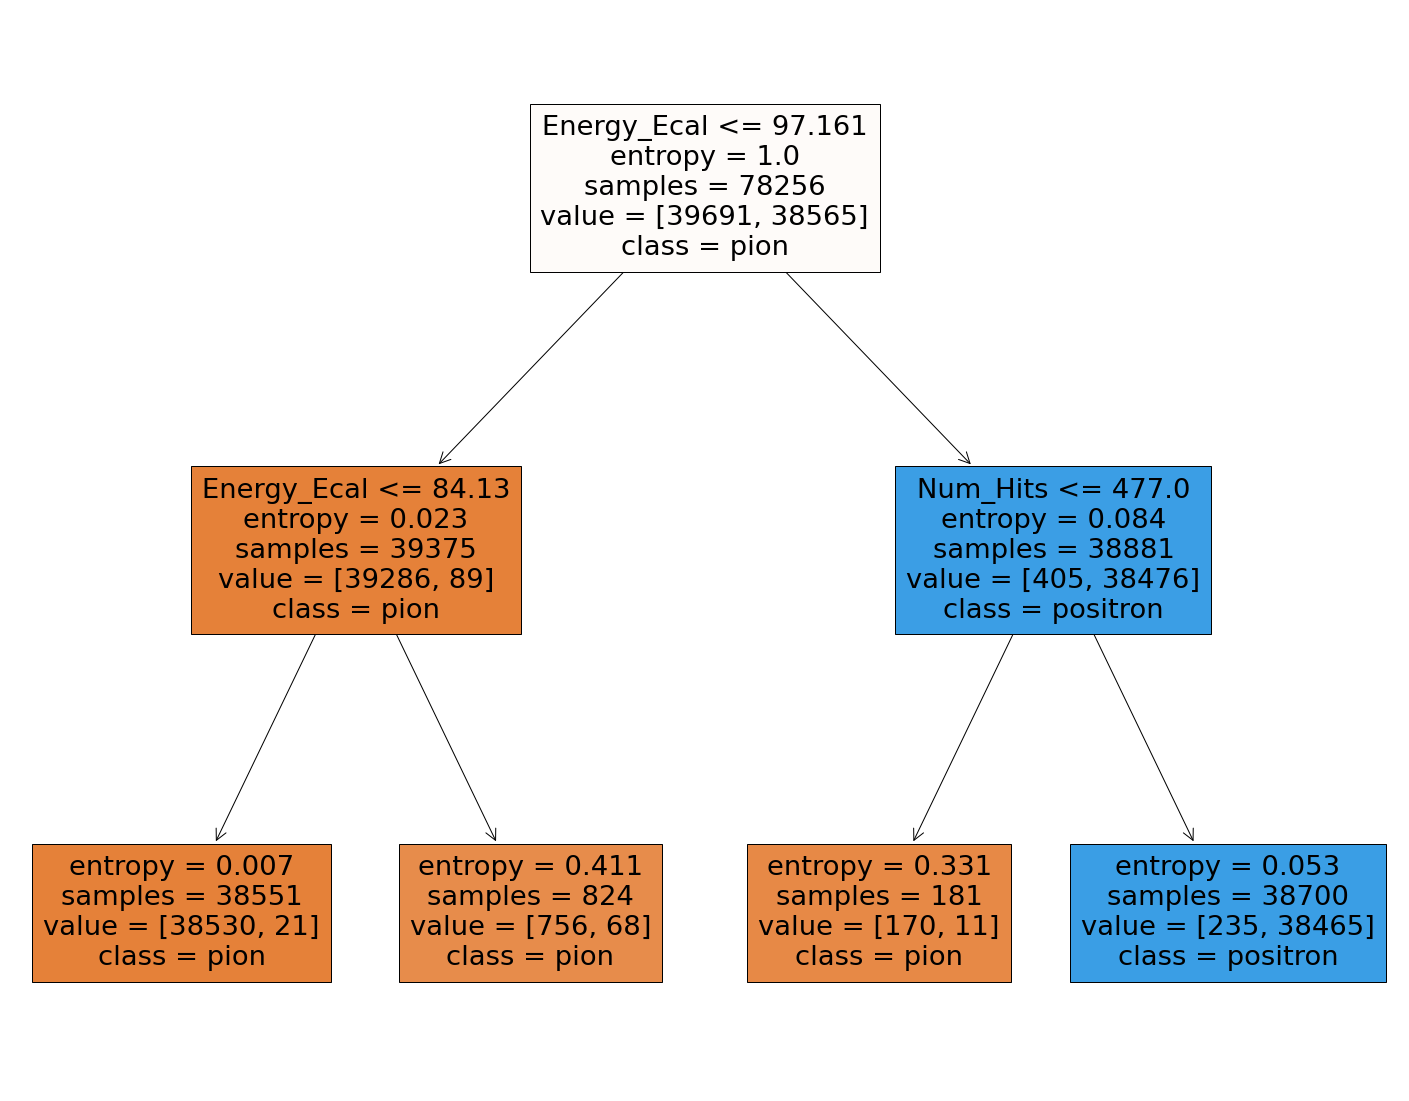

In [227]:
featureNames = features.columns[0:6]
targetNames = features["particle"].unique().tolist()
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_D_T, 
                   feature_names=featureNames,  
                   class_names=["pion","positron"],
                   filled=True)


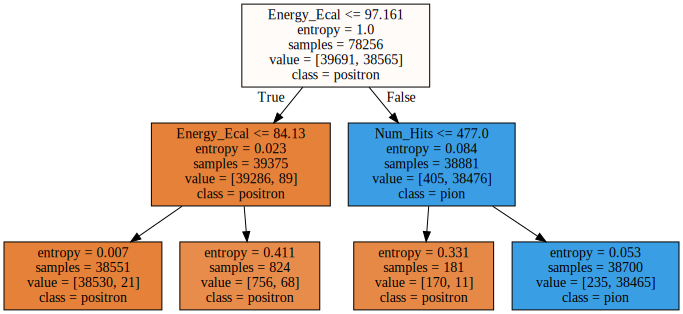

In [228]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(model_D_T, out_file=None, 
                                feature_names=featureNames,  
                                class_names=targetNames,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [229]:
graph.render("PID_DT")

'PID_DT.png'